<h1>Recipe for Rating: Predict Food Ratings using ML - MLP Project</h1>

**Name:** Archit Handa | **Roll No.:** 22F2000744 | **Student Email:** [22f2000744@ds.study.iitm.ac.in](mailto:22f2000744@ds.study.iitm.ac.in)

---

### **_Objective_**
>Create a Machine Learning model using scikit-learn to predict ratings for food recipes based on the various features

### **_Libraries_**
> #### **Data Analysis**
   >- Pandas    
   >- Numpy
   >- Scipy
   
> #### **Data Visualization**
   >- Matplotlib
   >- Seaborn

> #### **Modeling**
   >- Scikit-Learn
   >- XGBoost
   
> #### **Text Analysis - Inbuilt Libraries**
   >- Regex (re)
   >- HTML (html)
   >- UnicodeData (unicodedata)

# Table of Contents

- 1. [Importing Libraries](#Libraries)

- 2. [Loading Data](#Load-Data)

- 3. [Exploratory Data Analysis](#EDA)

    - 3.1 [Statistical Summaries](#Stat-Summary)
    
    - 3.2 [Hypothesis Testing](#Hypothesis)
    
    - 3.3 [Target Variable](#Target)
    
    - 3.4 [Missina and Duplicate Values](#Missing-Duplicate)
    
    - 3.5 [Numerical Features](#Numeric)
    
    - 3.6 [Date-Time Feature](#Date-Time)
    
    - 3.7 [Correlation Matrices](#Corr-Matrix)
    
    - 3.8 [EDA Conclusions](#EDA-Conclusion)

- 4. [Preprocessing](#Preprocessing)
    
    - 4.1 [Numerical Features](#Preprocessing-Numerical)
    
    - 4.2 [DateTime Features](#Preprocessing-DateTime)
    
    - 4.3 [Text Features - Latent Semantic Analysis (LSA)](#Preprocessing-Text)
    
    - 4.4 [Combined Preprocessor](#Preprocessing-Combined)

- 5. [Model Training and Selection](#Model-Training-Selection)

   - 5.1 [Train-Validation Datasets](#Train-Validation)
    
   - 5.2 [Helper Functions](#Helper)
    
   - 5.3 [Models](#Model)
    
       - 5.3.1 [Logistic Regression](#Logistic-Regression)
      
       - 5.3.2 [K-Nearest Neighbors](#KNN)
      
       - 5.3.3 [Support Vector Classifier](#SVC)
       
       - 5.3.4 [Decision Tree](#DT)
       
       - 5.3.5 [Random Forest - Bagging](#Random-Forest)
       
       - 5.3.6 [XGBoostClassifier - Boosting](#XGBoost)
       
       - 5.3.7 [Multi-Layer Perceptron](#MLP)
    
    - 5.4 [Model Comparison](#Model-Compare)
    
       - 5.4.1 [Comparing Metrics](#Compare-Metrics)
      
       - 5.4.2 [ROC Curves](#ROC-Curve)
      
    - 5.5 [Ensemble](#Ensemble)
    
       - 5.5.1 [Voting Classifier](#Voting)
      
         - 5.5.1.1 [Hard Voting Classifier](#Hard-Voting)
      
         - 5.5.1.2 [Soft Voting Classifier](#Soft-Voting)
      
       - 5.5.2 [Stacking Classifier](#Stacking)
    
    - 5.6 [Model Comparison Part-2](#Model-Compare-2)
    
       - 5.6.1 [ROC Curves](#ROC-Curve-2)
       
       - 5.6.2 [Confusion and Error Matrices](#Confusion-Error-Matrix)

- 6. [Conclusion](#Conclusion)

    - 6.1 [Final Model and Generating Submission File](#Final-Model)
    
    - 6.2 [Closing Remarks and Further Scope](#Close-Scope)

<a name='Libraries'></a>
# 1. Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import html
import unicodedata

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting random_state for reproducability
random_state = 42
np.random.seed(random_state)

<a name='Load-Data'></a>
# 2. Loading Data

In [3]:
# Load data from CSV files
PATH = '/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml'

train = pd.read_csv(os.path.join(PATH, 'train.csv'))
test = pd.read_csv(os.path.join(PATH, 'test.csv'))
sample = pd.read_csv(os.path.join(PATH, 'sample.csv'))

In [4]:
# Preview Train Data
train.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [5]:
# Preview Test Data
test.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,86,45,41384,Black Bean ‘n’ Pumpkin Chili,sp_aUSaElGf_41384_c_341929,u_1oKc4U6bh65cEli8Z8eTIf98Vpr,kalloween,1,1622718043,0,0,0,100,This was so good!! The pumpkin was perfect as...
1,102,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_274545,u_1oKW5seFLQMSwAeOfBVmwJizy5D,chocolate desert,1,1622717685,0,0,1,100,"So good! Could not stop eating them, so bad...."
2,156,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_398512,u_1oKZ6GUIAIol8xe6oEI7t1Mpxdz,Vantreesta,1,1622718307,0,0,0,100,I use a small ladle to fill muffin cups.
3,18,89,1324,Porcupine Meatballs,sp_aUSaElGf_1324_c_431662,u_1oKWCP33NVk4Osfpu4VJuIckEF0,Roberta L.Beauchamp,1,1622648872,0,4,3,212,I made this and followed the instructions as d...
4,27,70,32264,Easy Chicken Enchiladas,sp_aUSaElGf_32264_c_423935,u_1oKVhIJMuUlrSCVkbO1jheVTol8,fhquilting,1,1622718460,0,0,1,100,Very Good! I used corn tortillas. Used fresh...


In [6]:
# Preview Sample submission
sample.head()

,ID,Rating
0,1,5
1,2,2
2,3,4
3,4,2
4,5,4


In [7]:
# Checking shape of datasets
train.shape, test.shape, sample.shape

((13636, 15), (4546, 14), (1000, 2))

In [8]:
# Checking ratio of test set
print(f'Test Size Ratio (of Training Data): {test.shape[0] / train.shape[0]:.2f}')
print(f'Test Size Ratio (of Overall Data): {test.shape[0] / (train.shape[0] + test.shape[0]):.2f}')

Test Size Ratio (of Training Data): 0.33
Test Size Ratio (of Overall Data): 0.25


#### Key Insights:
- The train dataset composes of **13636 records** with **14 features** and **1 target** variable (_'Rating'_).
- The test dataset is roughly **one-third** ($1/3$) of the train dataset, while **one-fourth** ($1/4$) of the entire dataset.
- The 'Rating' variable for the test set needs to be predicted and, hence, is missing.
- Submission needs to be made with 2 columns ('ID' and 'Rating')

**Note:** Upon enquiry with the instructors, the 'ID' column of sample does not correspond with the 'ID' column of the dataset, and is just a row index starting from 1

<a name='EDA'></a>
# 3. Exploratory Data Analysis

<a name='Stat-Summary'></a>
## 3.1 Statistical Summaries

In [9]:
# Checking data type of each column
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


In [10]:
# Statistical Summary for Train data
train.describe(include='all')

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
count,13636.000000,13636.000000,13636.000000,13636,13636,13636,13636,13636.000000,1.363600e+04,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000,13634
unique,NaN,NaN,NaN,100,13636,10783,10620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13370
top,NaN,NaN,NaN,Cheeseburger Soup,sp_aUSaElGf_12259_c_149978,u_1oKVZoIOMWJ2j7TA7py2BIbf1mm,mjlouk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delicious!
freq,NaN,NaN,NaN,553,1,20,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
mean,121.085289,38.624377,21785.990833,NaN,NaN,NaN,NaN,2.160311,1.623713e+09,0.014520,1.098269,0.543708,4.288721,153.127897,NaN
std,116.995633,29.672351,23883.189918,NaN,NaN,NaN,NaN,10.086424,5.444020e+06,0.137323,4.166487,3.265660,1.544839,140.986908,NaN
min,0.000000,1.000000,386.000000,NaN,NaN,NaN,NaN,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,45.000000,12.000000,6504.000000,NaN,NaN,NaN,NaN,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000,NaN
50%,91.000000,33.000000,14600.000000,NaN,NaN,NaN,NaN,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000,NaN
75%,148.000000,63.000000,33121.000000,NaN,NaN,NaN,NaN,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000,NaN


In [11]:
# Unique entries per column
train.nunique()

# Total no. of rows: 13636

ID                     701
RecipeNumber           100
RecipeCode             100
RecipeName             100
CommentID            13636
UserID               10783
UserName             10620
UserReputation          20
CreationTimestamp     2422
ReplyCount               4
ThumbsUpCount           57
ThumbsDownCount         51
Rating                   6
BestScore              525
Recipe_Review        13370
dtype: int64

In [12]:
print(f'Number-type Columns: {list(train.select_dtypes(include="number").columns)}')
print(f'Object-type Columns: {list(train.select_dtypes(exclude="number").columns)}')

Number-type Columns: ['ID', 'RecipeNumber', 'RecipeCode', 'UserReputation', 'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore']
Object-type Columns: ['RecipeName', 'CommentID', 'UserID', 'UserName', 'Recipe_Review']


#### **Feature Types:**

> **Numerical:**
>   - ID
>   - RecipeNumber
>   - UserReputation
>   - CreationTimestamp
>   - ReplyCount
>   - ThumbsUpCount
>   - ThumbsDownCount
>   - BestScore


> **Categorical (Nominal):**
>   - RecipeCode
>   - RecipeName
>   - CommentID
>   - UserID
>   - UserName
    
> **Text:**
>   - RecipeName
>   - Recipe_Review
    
> **Target:**
>   - Rating: Discrete (0 or 1-5), Categorical-Ordinal

<br>

#### **Note on RecipeCode and RecipeNumber**
>Though, RecipeCode is numeric in nature, it has just _100_ unique values within the range of _386_-_191775_; thus, it seems more appropriate to be a numeric identifier for the recipe than representing any numerical measure.

>On the other, RecipeNumber also is a numeric quantity with _100_ unique values (range _1_-_100_); however, it represents the internal ranking for the recipe on the top-100 recipes list, and hence, is classified as a Numerical feature.

#### **Further inferences from the summaries:**

- RecipeNumber, RecipeCode, and RecipeName have _100_ unique values each; seems to be a one-one relation between all of three features

- CommentID has _13636_ unique values (same as number of records), hence might not be informative in this state; may require feature engineering

- UserID and UserName have similar unique counts (_10783_ and _10628_ respectively) hinting towards a one-one relation

- More information can be extracted from CreationTimestamp by converting into year, month, day etc.

- ReplyCount has extremely low unique count (_4_) with a near-zero mean of _0.014520_ and low standard deviation of _0.137323_; may require feature engineering

<br>

These inferences/hypotheses should be tested ahead.

<a name='Hypothesis'></a>
## 3.2 Hypothesis Testing

### 3.2.1 Hypothesis 1: One-One Relation between RecipeNumber, RecipeCode, RecipeName

All 3 features have exact 100 distinct values signalling a one-one relation

In [13]:
# Function to check one-one relation between 2 columns of a DataFrame
def is_one_one(df, col1, col2):
    return df.groupby(col1)[col2].nunique().max() == 1

In [14]:
print(f"One-one RecipeNumber and RecipeCode: {is_one_one(train, 'RecipeNumber', 'RecipeCode')}")
print(f"One-one RecipeNumber and RecipeName: {is_one_one(train, 'RecipeNumber', 'RecipeName')}")
print(f"One-one RecipeName and RecipeCode:   {is_one_one(train, 'RecipeName', 'RecipeCode')}")

One-one RecipeNumber and RecipeCode: True
One-one RecipeNumber and RecipeName: True
One-one RecipeName and RecipeCode:   True


**Hypothesis 1**

> **Confirmed:** As suspected, the 3 features are linked to each other.

> **Conclusion:**
> - Treat RecipeNumber as a Numerical Feature as it contains information regarding internal rank for a recipe
> - Treat RecipeName as Text Feature since it contains sentiment words, like 'Simple', 'Basic', 'First-Place'
> - Drop RecipeCode as it is just an identifier for each recipe, and OneHotEncoding it will create 100 sparse features

### 3.2.2 Hypothesis 2: CommentID is unique

While there are 13636 values signalling CommentID being unique feature, its values hint at it being a composite feature (joined by '_')

In [15]:
# Extracting individual component from CommentID feature
cid = pd.DataFrame()
cid['CommentID'] = train['CommentID'].copy()

n_components = len(train.loc[0, 'CommentID'].split('_'))
for i in range(n_components):
    cid[f'Part_{i + 1}'] = cid['CommentID'].apply(lambda x: x.split('_')[i].strip())

cid

,CommentID,Part_1,Part_2,Part_3,Part_4,Part_5
0,sp_aUSaElGf_12259_c_149978,sp,aUSaElGf,12259,c,149978
1,sp_aUSaElGf_8202_c_310332,sp,aUSaElGf,8202,c,310332
2,sp_aUSaElGf_2832_c_206522,sp,aUSaElGf,2832,c,206522
3,sp_aUSaElGf_100276_c_434088,sp,aUSaElGf,100276,c,434088
4,sp_aUSaElGf_19731_c_387011,sp,aUSaElGf,19731,c,387011
...,...,...,...,...,...,...
13631,sp_aUSaElGf_11767_c_127710,sp,aUSaElGf,11767,c,127710
13632,sp_aUSaElGf_21444_c_196030,sp,aUSaElGf,21444,c,196030
13633,sp_aUSaElGf_20170_c_359338,sp,aUSaElGf,20170,c,359338
13634,sp_aUSaElGf_24886_c_175514,sp,aUSaElGf,24886,c,175514


In [16]:
print(f'Number of Distinct Values (Part-1): {cid["Part_1"].nunique()}')
print(f'Number of Distinct Values (Part-2): {cid["Part_2"].nunique()}')
print(f'Number of Distinct Values (Part-3): {cid["Part_3"].nunique()}')
print(f'Number of Distinct Values (Part-4): {cid["Part_4"].nunique()}')
print(f'Number of Distinct Values (Part-5): {cid["Part_5"].nunique()}')

Number of Distinct Values (Part-1): 1
Number of Distinct Values (Part-2): 1
Number of Distinct Values (Part-3): 100
Number of Distinct Values (Part-4): 1
Number of Distinct Values (Part-5): 13636


- Part 1, 2, and 4 are common for all records

- Part 5 is unique for all records

- Part 3 has 100 distinct values, same as RecipeCode

In [17]:
cid['Part_3'].astype('int64').equals(train['RecipeCode'])

True

As anticipated, Part 3 of CommentID and RecipeCode are the exact same values

**Hypothesis 2**

> **Confirmed:** CommentID does not provide any extra information

> **Conclusion:**
> - Drop CommentID feature

### 3.2.3 Hypothesis 3: UserID and UserName are highly dependent features

UserID and UserName have similar distinct value counts (10783 and 10628 respectively)

In [18]:
# Contingency Table for UsrID and UserName
uid_uname_contingency_table = train.groupby('UserID')['UserName'].value_counts().unstack().replace(np.nan, 0)

Perform $\chi^2$ Test of Independence for UserID-UserName Contingency Table

- $\text{H}_0$: UserID and UserName are independent
- $\text{H}_{\text{A}}$: UserID and UserName are dependent

In [19]:
from scipy.stats import chi2, chi2_contingency

# Perform Chi-square Test of Independence
chi2_comp, p_value, dof, expected_ct = chi2_contingency(uid_uname_contingency_table)

alpha = 0.01
chi2_tab = chi2.ppf(1 - alpha, dof)

print(f'Computed Chi-square:  {chi2_comp:.4f}')
print(f'Tabular Chi-square :  {chi2_tab:.4f}\n')

print(f'p-Value            :  {p_value:.2f}')
print(f'Significance Level :  {alpha:.2f}')

Computed Chi-square:  144800684.0000
Tabular Chi-square :  114529264.0591

p-Value            :  0.00
Significance Level :  0.01


In [20]:
# Reject or Fail to reject Null Hypothesis
if chi2_comp > chi2_tab and p_value < alpha:
    print('Reject H_0 and conclude UserID and UserName are dependent')
else:
    print('Fail to reject H_0 and conclude UserID and UserName are independent')

Reject H_0 and conclude UserID and UserName are dependent


In [21]:
print(f"Percentage Unique in UserID  : {train['UserID'].nunique() / train.shape[0] * 100:.2f}%")
print(f"Percentage Unique in UserName: {train['UserName'].nunique() / train.shape[0] * 100:.2f}%")

Percentage Unique in UserID  : 79.08%
Percentage Unique in UserName: 77.88%


**Hypothesis 3**

> **Confirmed:** Reject $\text{H}_0$ and conclude that UserName and UserID are highly dependent even at a significance level of 1%

> **Conclusion:**
> - Drop UserID and UserName because they are almost unique values (~80%)

<a name='Target'></a>
## 3.3 Target Variable

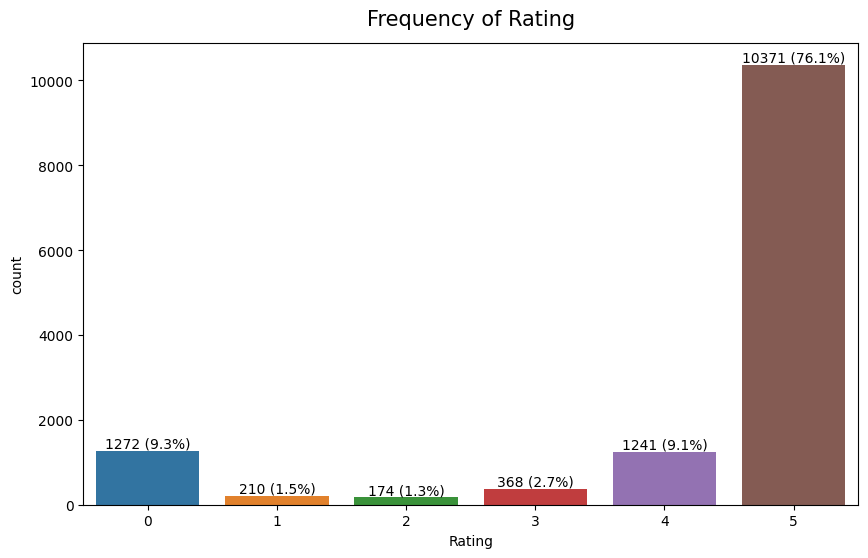

In [22]:
# Frequency Distribution of Target Variable - 'Rating'
abs_values = train['Rating'].value_counts().sort_index()
rel_values = train['Rating'].value_counts(normalize=True).sort_index() * 100
lbls = [f'{abs} ({rel:.1f}%)' for abs, rel in zip(abs_values, rel_values)]

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=train, x='Rating')
plt.title('Frequency of Rating', y=1.02, fontsize=15)
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.show()

In [23]:
null_accuracy = train['Rating'].value_counts(normalize=True).max() * 100
print(f'Null Accuracy: {null_accuracy:.2f}%')

Null Accuracy: 76.06%


As evident from the values taken by the target variable, Rating, this Machine Learning model aims to predict an ordinal categorical variable. Hence, it can be considered as a _'Multi-class Classification'_ problem with 0-5 being the class labels.

From the plot above, it is evident that the dataset is imbalanced. In fact, the null accuracy is of _76.06%_, which means even if the model predicts the most frequent rating everytime, it will achieve an accuarcy of _76.06%_.

Therefore, 2 important aspects need to be considered:

1. **Handling Imbalance**

   Data Balancing techniques, like SMOTE, can be used; however, this might not be effective in this particular scenario. This is because of the Rating 0 that signifies the review has not been scored, meaning it may possess properties similar to other Ratings (1-5) and hence, may deviate the model from learning effectively. In fact, I tried using SMOTE and unfortunately, the model was tending to underfit.
   
   On the other hand, to handle data imbalance, while training the model, the dataset can be split in a stratified manner to maintain proportions for each class.
   
2. **Evaluation Metric**

    Accuracy is testing metric for this competition; however, considering the imbalance, it might be better suited to evaluate the model on other metrics as well, including Precision, Recall, and F1 Score.

<a name='Missing-Duplicate'></a>
## 3.4 Missing and Duplicate Values

In [24]:
# Check missing values in train
train.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

In [25]:
print(f'Missing values in Recipe_Review (train dataset): {train["Recipe_Review"].isnull().sum()}')

Missing values in Recipe_Review (train dataset): 2


In [26]:
# Check invalid values (not containing any alphanumeric character) in Recipe_Review in train
def no_alnum(x):
    if isinstance(x, str):
        return not any(char.isalnum() for char in x)
    else:
        return True

print(train[train['Recipe_Review'].apply(no_alnum)]['Recipe_Review'], end='\n\n')

print(f'Invalid values in Recipe_Review (train dataset): {train[train["Recipe_Review"].apply(no_alnum)].shape[0]}')

2984          NaN
3542             
3886           ??
6018             
9853            .
11246           .
11269           .
11654         NaN
12272          ??
13086           .
Name: Recipe_Review, dtype: object

Invalid values in Recipe_Review (train dataset): 10


In [27]:
# Check missing values in test
test.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
BestScore            0
Recipe_Review        0
dtype: int64

In [28]:
# Checking invalid values in Recipe_Review in test
print(test[test['Recipe_Review'].apply(no_alnum)]['Recipe_Review'], end='\n\n')

print(f'Invalid values in Recipe_Review (test dataset): {test[test["Recipe_Review"].apply(no_alnum)].shape[0]}')

69       !
230       
1674    ??
2072     .
Name: Recipe_Review, dtype: object

Invalid values in Recipe_Review (test dataset): 4


In [29]:
# Check duplicate records in train and test
train.duplicated().any(), test.duplicated().any()

(False, False)

**Insights:**

- There are no duplicate records in the datasets.

- There are 2 missing values in train dataset (Recipe_Review), while no missing values in test dataset.

- Upon further inspection, it is found overall 10 and 4 invalid values (not containing any alphanumeric character) exist for Recipe_Review for train and test datasets respectively. 

<br>

To mitigate this issue, either (a) these values can be imputed with a constant value or (b) they can handled during the text vectorization step. In this notebook, option (b) has been opted.

<a name='Numeric'></a>
## 3.5 Numerical Features

In [30]:
numerical_features = ['ID', 'RecipeNumber', 'UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']

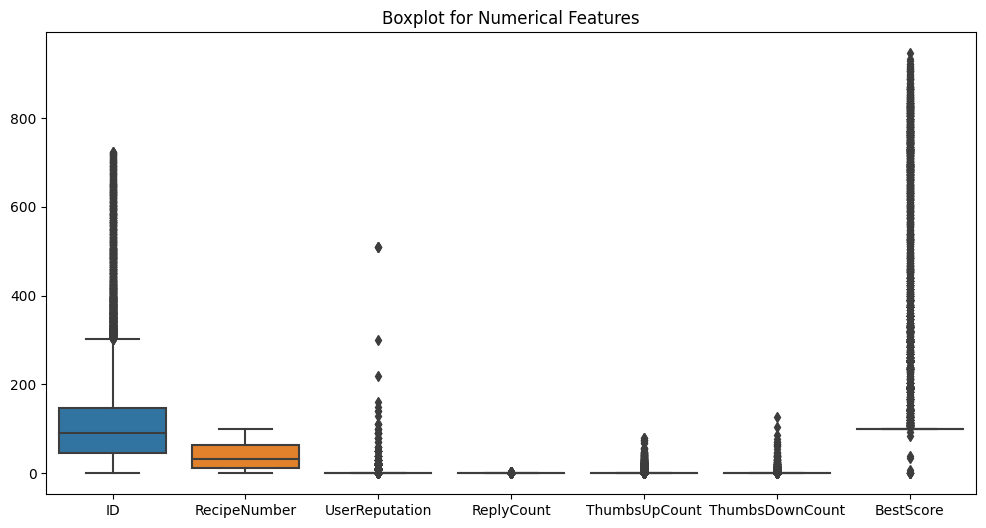

In [31]:
act = train[numerical_features]

# Boxplot for Numeric Features
plt.figure(figsize=(12, 6))
sns.boxplot(act)
plt.title('Boxplot for Numerical Features')
plt.show()

In [32]:
# Function to find count and percentage of outliers using IQR method
def outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    temp = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    return pd.DataFrame({
        'Count': temp.sum(),
        'Percentage': round(temp.mean() * 100, 2)
    })

In [33]:
# Outlier Count for Original Numeric Features
act_outlier = outliers(act)
act_outlier

,Count,Percentage
ID,1077,7.90
RecipeNumber,0,0.00
UserReputation,928,6.81
ReplyCount,172,1.26
ThumbsUpCount,3054,22.40
ThumbsDownCount,1820,13.35
BestScore,3130,22.95


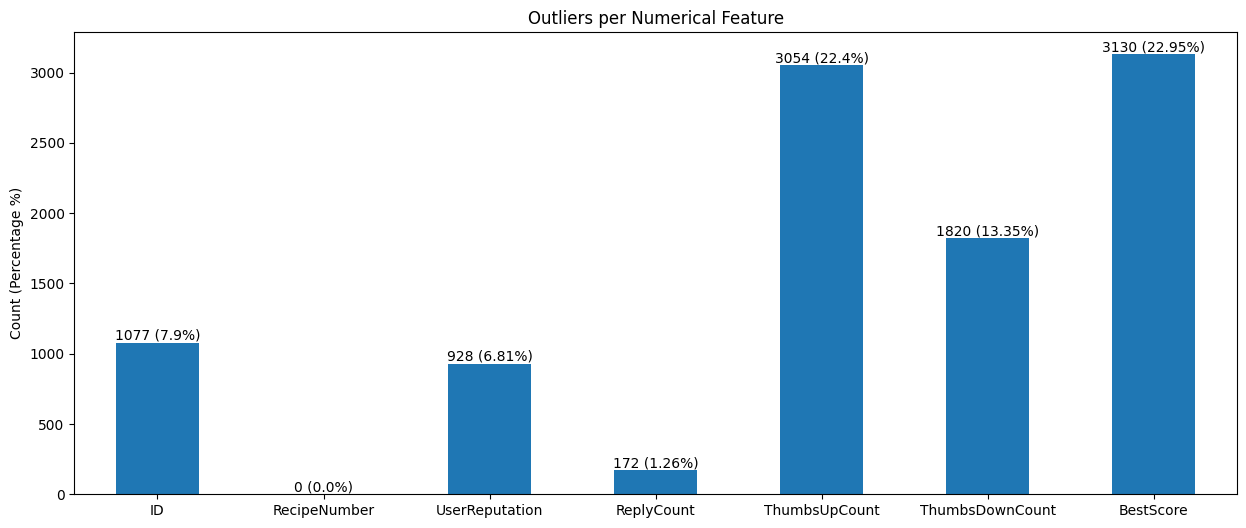

In [34]:
# Bar plot of Outlier Count
plt.figure(figsize=(15, 6))
ax = act_outlier['Count'].plot.bar(rot=0)
lbls = [f'{act_outlier.loc[idx, "Count"]} ({act_outlier.loc[idx, "Percentage"]}%)' for idx in act_outlier.index]
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.ylabel('Count (Percentage %)')
plt.title('Outliers per Numerical Feature')
plt.show()

From the boxplot and the outlier count plot, it can be seen that there are a lot of outliers, especially for ThumbsUpCount, ThumbsDownCount, and BestScore features, based on the IQR-method.

Dropping / Imputing the respective records might cause a lot of information to be lost.

Transforming these might seem a better solution to tackle outliers.

### Normalizer

Scales each sample individually to unit norm (in this case, L2-norm)

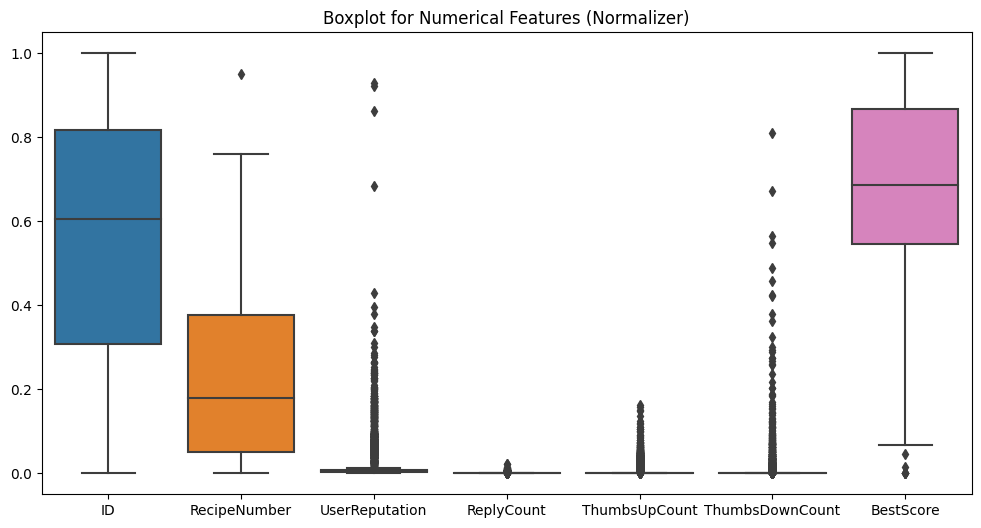

In [35]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer(norm='l2').set_output(transform='pandas')
norm = normalizer.fit_transform(act)

# Boxplot for Normalized Numeric Features
plt.figure(figsize=(12, 6))
sns.boxplot(norm)
plt.title('Boxplot for Numerical Features (Normalizer)')
plt.show()

In [36]:
norm_outlier = outliers(norm)
norm_outlier

,Count,Percentage
ID,0,0.00
RecipeNumber,1,0.01
UserReputation,812,5.95
ReplyCount,172,1.26
ThumbsUpCount,3054,22.40
ThumbsDownCount,1820,13.35
BestScore,8,0.06


### Quantile Transformer (Uniform)

Applies non-linear transformation to map probability density function to a Uniform Distribution

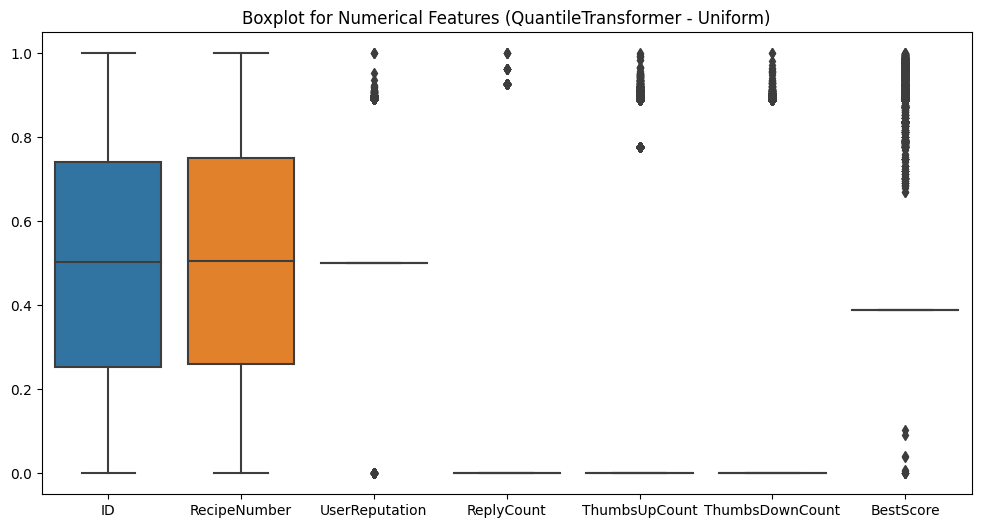

In [37]:
from sklearn.preprocessing import QuantileTransformer

qut = QuantileTransformer(n_quantiles=10, output_distribution='uniform', random_state=random_state).set_output(transform='pandas')
qu = qut.fit_transform(act)

# Boxplot for Uniform QuantileTransformed Numeric Features
plt.figure(figsize=(12, 6))
sns.boxplot(qu)
plt.title('Boxplot for Numerical Features (QuantileTransformer - Uniform)')
plt.show()

In [38]:
qu_outlier = outliers(qu)
qu_outlier

,Count,Percentage
ID,0,0.00
RecipeNumber,0,0.00
UserReputation,928,6.81
ReplyCount,172,1.26
ThumbsUpCount,3054,22.40
ThumbsDownCount,1820,13.35
BestScore,3130,22.95


### Quantile Transformer (Gaussian)

Applies non-linear transformation to map probability density function to a Gaussian Distribution

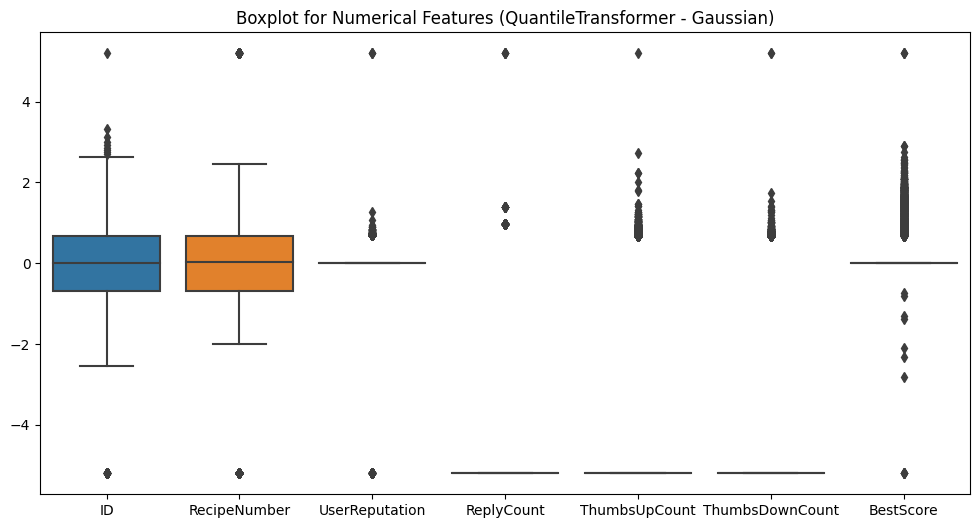

In [39]:
qgt = QuantileTransformer(n_quantiles=5, output_distribution='normal', random_state=random_state).set_output(transform='pandas')
qg = qgt.fit_transform(act)

# Boxplot for Gaussian QuantileTransformed Numeric Features
plt.figure(figsize=(12, 6))
sns.boxplot(qg)
plt.title('Boxplot for Numerical Features (QuantileTransformer - Gaussian)')
plt.show()

In [40]:
qg_outlier = outliers(qg)
qg_outlier

,Count,Percentage
ID,81,0.59
RecipeNumber,573,4.20
UserReputation,928,6.81
ReplyCount,172,1.26
ThumbsUpCount,3054,22.40
ThumbsDownCount,1820,13.35
BestScore,3130,22.95


### PowerTransformer

#### Box-Cox Transformer

Transforms non-normal distribution by stabilising the variance

It is mathematically defined as
$$
x_{i}^{(\lambda)} = 
\begin{cases}
\frac{{x_{i}^\lambda - 1}}{{\lambda}}, & \text{if } \lambda \neq 0 \\
\ln(x_i), & \text{if } \lambda = 0
\end{cases}
$$

where optimal value of $\lambda$, parameter for stabilizing variance and minimizing skewness, is estimated by PowerTransformer through maximum likelihood

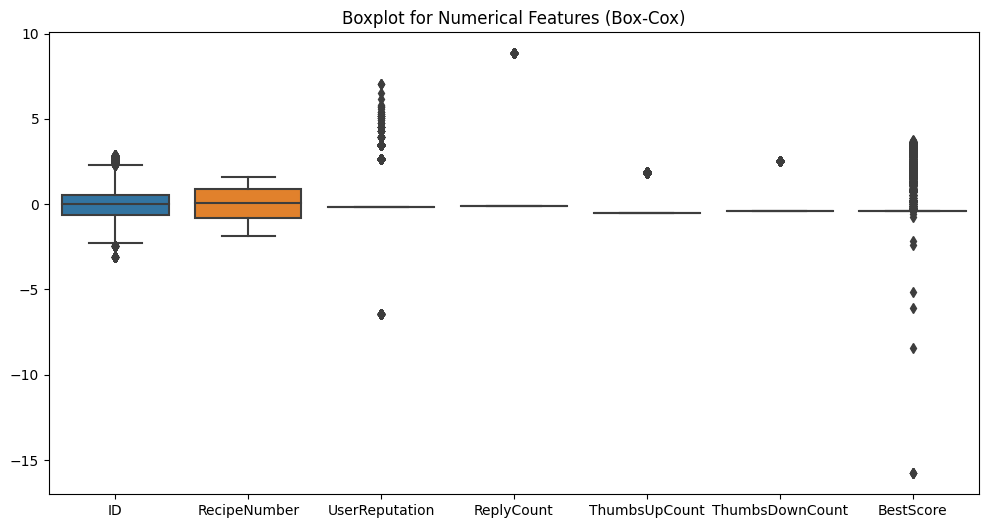

In [41]:
from sklearn.preprocessing import PowerTransformer

bct = PowerTransformer(method='box-cox', standardize=True).set_output(transform='pandas')
bc = bct.fit_transform(act + 0.01)    # Box-Cox Transformer works on strictly positive data

# Boxplot for Box-Cox Numeric Features
plt.figure(figsize=(12, 6))
sns.boxplot(bc)
plt.title('Boxplot for Numerical Features (Box-Cox)')
plt.show()

In [42]:
bc_outlier = outliers(bc)
bc_outlier

,Count,Percentage
ID,416,3.05
RecipeNumber,0,0.00
UserReputation,928,6.81
ReplyCount,172,1.26
ThumbsUpCount,3054,22.40
ThumbsDownCount,1820,13.35
BestScore,3130,22.95


#### Yeo-Johnson Transformer

Similar to Box-Cox Transformer, but works on negative values as well

It is mathematically defined as

$$
x_{i}^{(\lambda)} = 
\begin{cases}
[(x_i + 1)^\lambda - 1] / \lambda, & \text{if } \lambda \neq 0, x_i \geq 0 \\
\ln(x_i + 1), & \text{if } \lambda = 0, x_i \geq 0 \\
-[(-x_i + 1)^{2 - \lambda} - 1] / (2 - \lambda), & \text{if } \lambda \neq 2, x_i < 0 \\
-\ln(-x_i + 1), & \text{if } \lambda = 2, x_i < 0
\end{cases}
$$

where optimal value of $\lambda$, parameter for stabilizing variance and minimizing skewness, is estimated by PowerTransformer through maximum likelihood

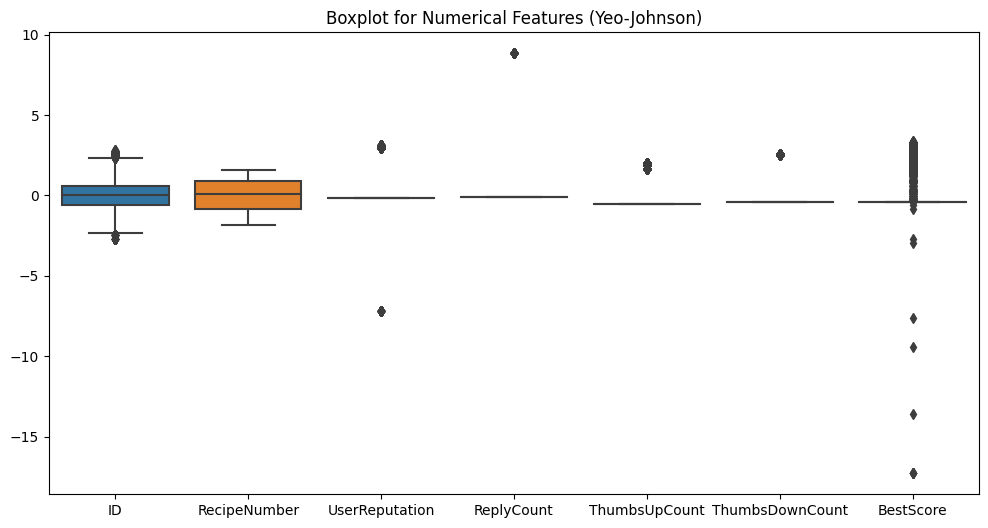

In [43]:
from sklearn.preprocessing import PowerTransformer

yjt = PowerTransformer(method='yeo-johnson', standardize=True).set_output(transform='pandas')
yj = yjt.fit_transform(act)

# Boxplot for Yeo-Johnson Numeric Features
plt.figure(figsize=(12, 6))
sns.boxplot(yj)
plt.title('Boxplot for Numerical Features (Yeo-Johnson)')
plt.show()

In [44]:
yj_outlier = outliers(yj)
yj_outlier

,Count,Percentage
ID,374,2.74
RecipeNumber,0,0.00
UserReputation,928,6.81
ReplyCount,172,1.26
ThumbsUpCount,3054,22.40
ThumbsDownCount,1820,13.35
BestScore,3130,22.95


In [45]:
comb = pd.concat([act_outlier, norm_outlier, qu_outlier, qg_outlier, bc_outlier, yj_outlier], axis=1)
comb.columns = [
    'Actual Count',
    'Actual Percentage',
    'Normalizer Count',
    'Normalizer Percentage',
    'Uniform QuantileTransformer Count',
    'Uniform QuantileTransformer Percentage',
    'Gaussian QuantileTransformer Count',
    'Gaussian QuantileTransformer Percentage',
    'Box-Cox Count',
    'Box-Cox Percentage',
    'Yeo-Johnson Count',
    'Yeo-Johnson Percentage'
]
comb

,Actual Count,Actual Percentage,Normalizer Count,Normalizer Percentage,Uniform QuantileTransformer Count,Uniform QuantileTransformer Percentage,Gaussian QuantileTransformer Count,Gaussian QuantileTransformer Percentage,Box-Cox Count,Box-Cox Percentage,Yeo-Johnson Count,Yeo-Johnson Percentage
ID,1077,7.90,0,0.00,0,0.00,81,0.59,416,3.05,374,2.74
RecipeNumber,0,0.00,1,0.01,0,0.00,573,4.20,0,0.00,0,0.00
UserReputation,928,6.81,812,5.95,928,6.81,928,6.81,928,6.81,928,6.81
ReplyCount,172,1.26,172,1.26,172,1.26,172,1.26,172,1.26,172,1.26
ThumbsUpCount,3054,22.40,3054,22.40,3054,22.40,3054,22.40,3054,22.40,3054,22.40
ThumbsDownCount,1820,13.35,1820,13.35,1820,13.35,1820,13.35,1820,13.35,1820,13.35
BestScore,3130,22.95,8,0.06,3130,22.95,3130,22.95,3130,22.95,3130,22.95


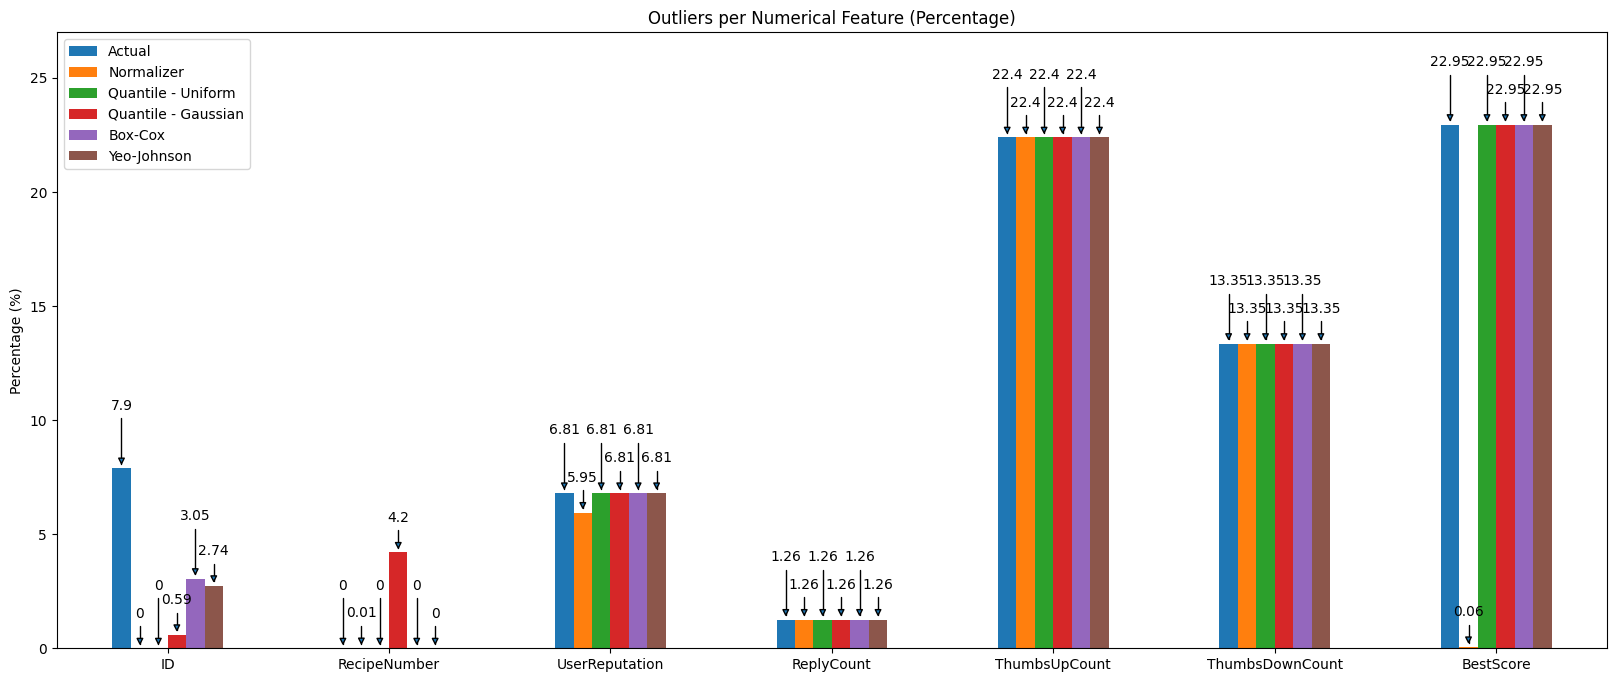

In [46]:
# Bar plot of Combined Outlier Count
ax = comb.iloc[:, 1::2].plot.bar(rot=0, figsize=(20, 8))
[ax.bar_label(container=ax.containers[i], label_type='edge', padding=(30+10*np.sin(np.pi*(i+0.5))), arrowprops=dict(arrowstyle="-|>", connectionstyle="angle,angleA=0,angleB=90,rad=10")) for i in range(6)]
plt.ylabel('Percentage (%)')
plt.ylim((0, 27))
plt.title('Outliers per Numerical Feature (Percentage)')
plt.legend(['Actual', 'Normalizer', 'Quantile - Uniform', 'Quantile - Gaussian', 'Box-Cox', 'Yeo-Johnson'], loc='upper left')
plt.show()

The above graph shows the impact of different transformers on reducing the number of outliers.

- Normalizer seems most effective for columns ID, UserReputation (marginally effective), and BestScore

- Uniform QuantileTransformer seems most effective for column ID

- RecipeNumber had no outliers and can be scaled using MinMaxScaler, StandardScaler, or even a Transformer

- None of the transformers were effective for ReplyCount, ThumbsUpCount, and ThumbsDownCount

<br>

For UserReputation, ReplyCount, ThumbsUpCount, and ThumbsDownCount, it might be better to convert into bins or ordinal categories.

### Binning

In [47]:
train['UserReputation'].value_counts().sort_index()

UserReputation
0        118
1      12708
10       478
20       217
30        54
40        12
50        16
60         4
70         2
80         4
90         7
100        3
110        3
130        1
140        2
150        1
160        1
220        1
300        1
510        3
Name: count, dtype: int64

In [48]:
# Function to categorise UserReputation
def categorise_reputation(reputation):
    if reputation <= 1:    # Low Reputation
        return 0
    elif reputation <= 50: # Medium Reputation
        return 1
    else:                  # High Reputation
        return 2

,Count,Percentage
UserReputation,810,5.94


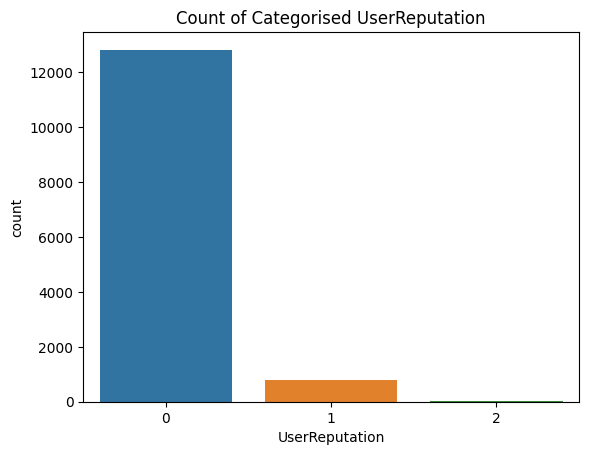

In [49]:
# Bin UserReputation in 3 categories: Low, Medium, and High
binned_reputation = pd.DataFrame(train['UserReputation'].apply(categorise_reputation))

sns.countplot(binned_reputation, x='UserReputation')
plt.title('Count of Categorised UserReputation')

outliers(binned_reputation)

Since majority of the records (_12708_ records) have UserReputation of 1, it seems unlikely that outliers can be removed through transformation. Thus, the feature has been converted as an ordinal data of 3 categories (Low: 0, Medium: 1, High: 2) to capture as much information as possible. However, given the skewness of this feature, it is unlikely that this feature will have high importance during prediction.

In [50]:
train['ReplyCount'].value_counts().sort_index()

ReplyCount
0    13464
1      151
2       16
3        5
Name: count, dtype: int64

Similarly, for ReplyCount feature, the values are highly imbalanced with only 4 unique values. Thus, it might be better to convert it to a binary variable with value 1 if the review is replied to, else 0.

### Feature Engineering

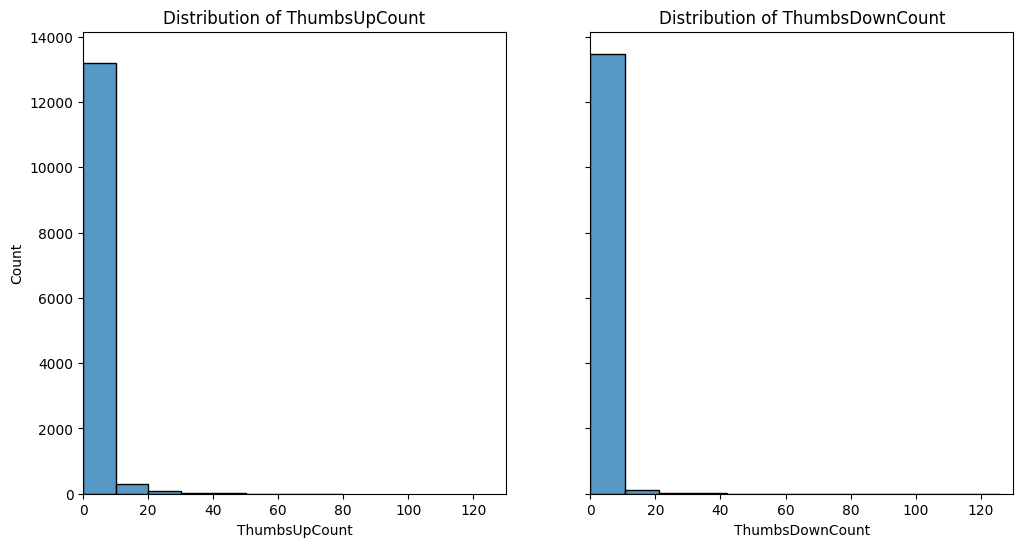

In [51]:
# Visualise distribution of ThumbsUpCount and ThumbsDownCount
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

sns.histplot(act[['ThumbsUpCount']], x='ThumbsUpCount', ax=ax[0], bins=8)
ax[0].set_title('Distribution of ThumbsUpCount')
ax[0].set_xlim(0, 130)

sns.histplot(act[['ThumbsDownCount']], x='ThumbsDownCount', ax=ax[1], bins=12)
ax[1].set_title('Distribution of ThumbsDownCount')
ax[1].set_xlim(0, 130)

plt.show()

The above histograms depict the imbalance and highly skewed ThumbsUpCount and ThumbsDownCount features. Binning as a binary variable seems appropriate solution.

On the other hand, engineering a new numerical feature using these might help capture certain underlying patterns. In this project, we will try to create a new feature that tries to capture the ratio of the 2 features, since such a feature is not captured using methods like PolynomialFeatures.

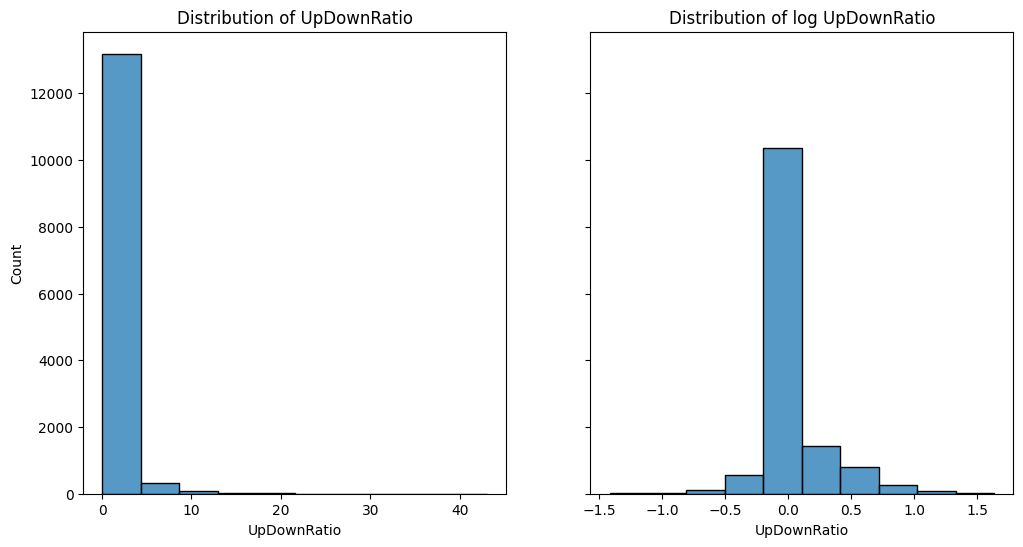

In [52]:
from sklearn.preprocessing import FunctionTransformer

act['UpDownRatio'] = (act['ThumbsUpCount'] + 1) / (act['ThumbsDownCount'] + 1)
# 1 has been added to numerator and denominator to adjust for 0 values

# taking log of the ratio to bring a more normal-like distribution
udrt = FunctionTransformer(np.log10).set_output(transform='pandas')
udr = udrt.fit_transform(act[['UpDownRatio']])

fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 6))

sns.histplot(act[['UpDownRatio']], x='UpDownRatio', bins=10, ax=ax[0])
ax[0].set_title('Distribution of UpDownRatio')

sns.histplot(udr, x='UpDownRatio', bins=10, ax=ax[1])
ax[1].set_title('Distribution of log UpDownRatio')

plt.show()

Apart from taking the ratio, its $\log_{10}$ was taken to bring out a more normal distribution, which is generally much easier to interpret for models, like LogisticRegression, and is symmetric with a well-defined mean and standard deviation.

<a name='Date-Time'></a>
## 3.6 Date-Time Feature

In [53]:
# Extract year, month, day of week, and hour from CreationTimestamp
dt = pd.DataFrame()
dt['CreationTimestamp'] = train['CreationTimestamp'].copy()
dt['timestamp'] = pd.to_datetime(dt['CreationTimestamp'], unit='s')
dt['year'] = dt['timestamp'].dt.year
dt['month'] = dt['timestamp'].dt.month
dt['dayofweek'] = dt['timestamp'].dt.dayofweek
dt['hour'] = dt['timestamp'].dt.hour
dt.drop(['CreationTimestamp', 'timestamp'], axis=1, inplace=True)
dt

,year,month,dayofweek,hour
0,2021,6,3,10
1,2021,6,3,10
2,2021,6,3,10
3,2021,6,2,15
4,2021,6,3,11
...,...,...,...,...
13631,2021,6,3,10
13632,2021,6,3,10
13633,2021,6,3,11
13634,2021,6,3,10


In [54]:
pd.DataFrame(dt['year'].value_counts()).columns

Index(['count'], dtype='object')

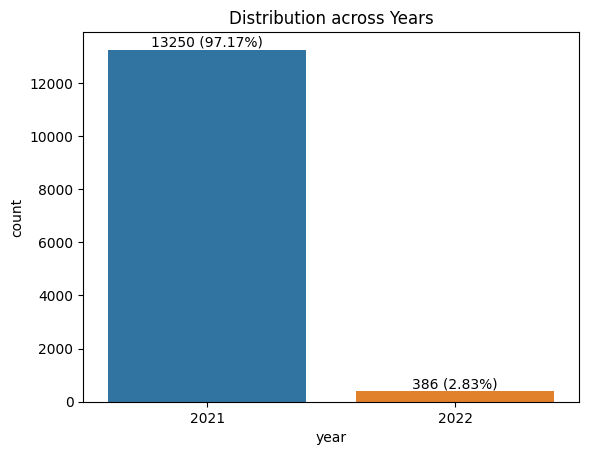

In [55]:
# Distribution across Years
ax = sns.countplot(dt[['year']], x='year')
lbls = [f'{count} ({count / dt.shape[0] * 100:.2f}%)' for count in pd.DataFrame(dt['year'].value_counts())['count']]
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.title('Distribution across Years')
plt.show()

The data is from years 2021-22 with majority (~97%) from 2021

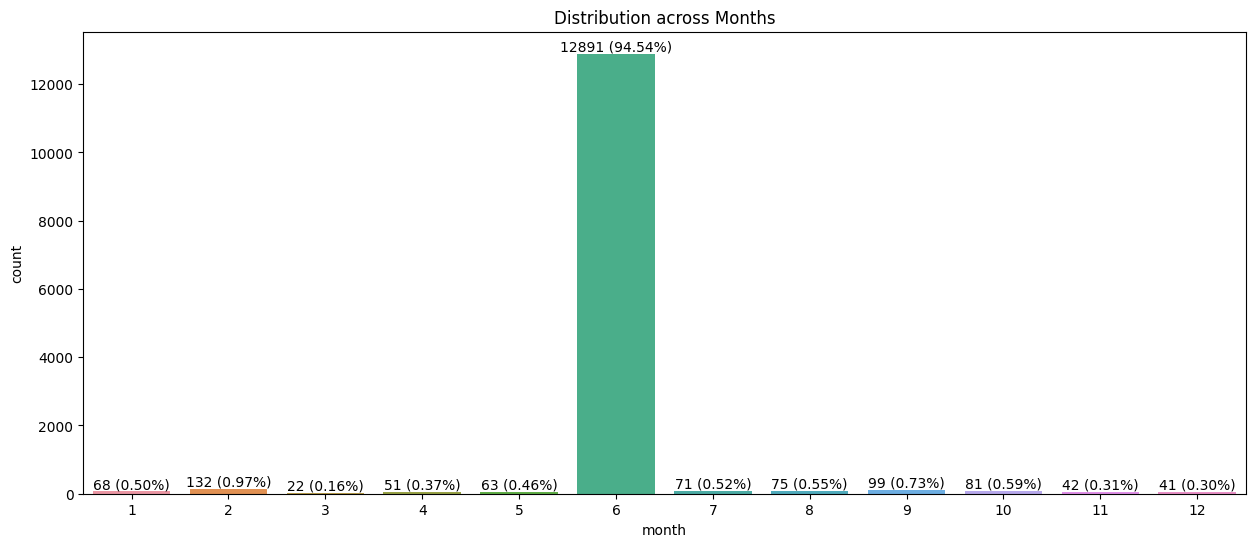

In [56]:
# Distribution across Months
plt.figure(figsize=(15, 6))
ax = sns.countplot(dt, x='month')
lbls = [f'{count} ({count / dt.shape[0] * 100:.2f}%)' for count in pd.DataFrame(dt['month'].value_counts().sort_index())['count']]
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.title('Distribution across Months')
plt.show()

Most of the Reviews are from June (6th  Month) (~95%)

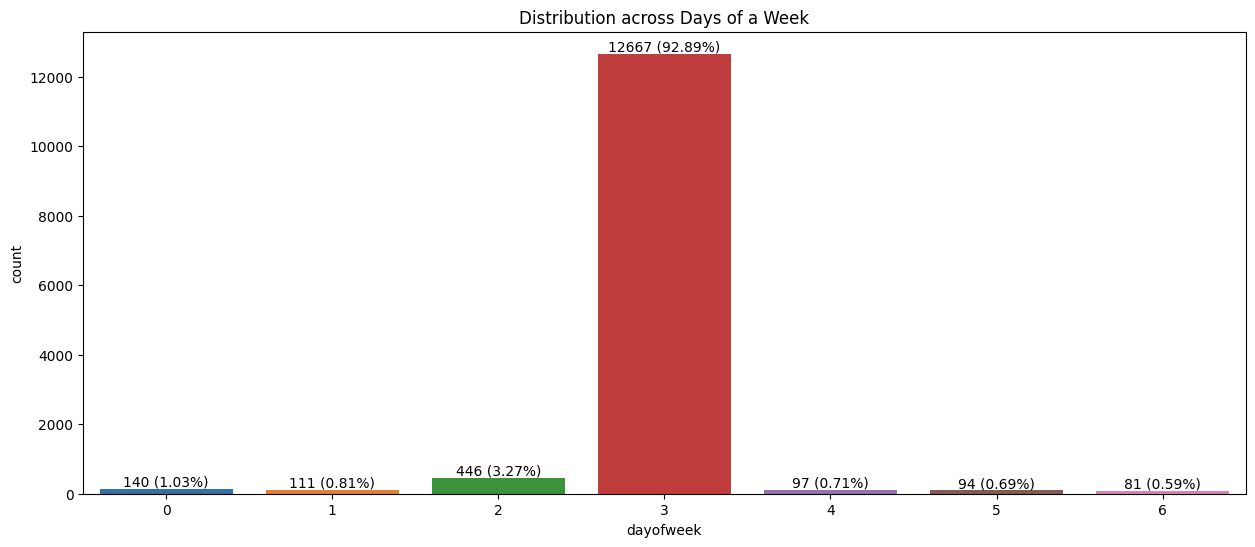

In [57]:
# Distribution across Days of a Week
plt.figure(figsize=(15, 6))
ax = sns.countplot(dt, x='dayofweek')
lbls = [f'{count} ({count / dt.shape[0] * 100:.2f}%)' for count in pd.DataFrame(dt['dayofweek'].value_counts().sort_index())['count']]
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.title('Distribution across Days of a Week')
plt.show()

Majority of reviews are posted on Thursday (Day 4, Monday starts at 0) (~93%)

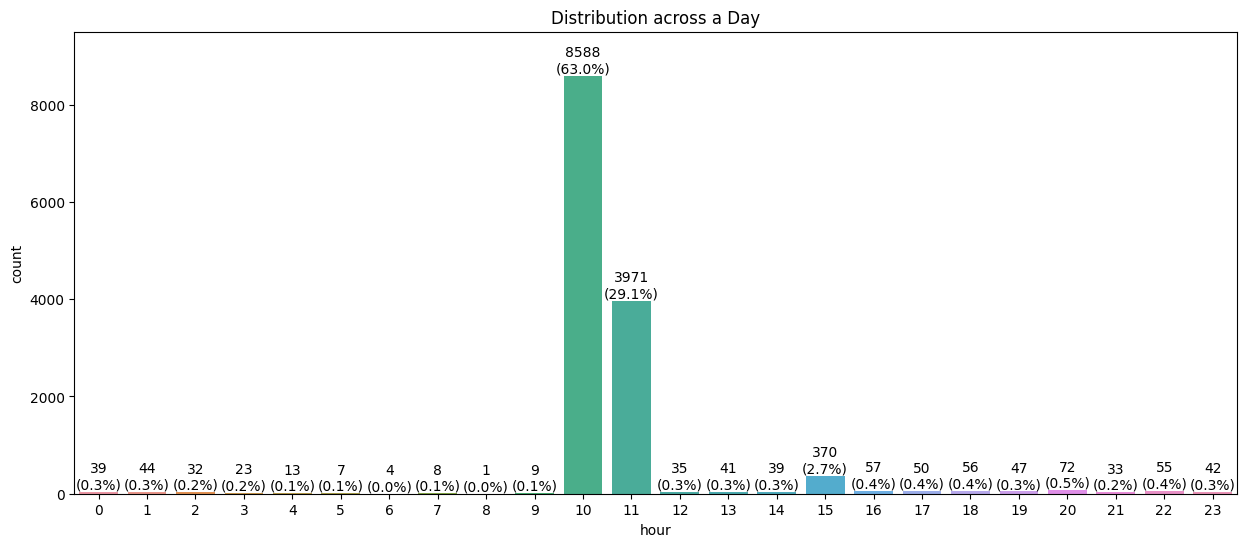

In [58]:
# Distribution across a Day
plt.figure(figsize=(15, 6))
ax = sns.countplot(dt, x='hour')
lbls = [f'{count}\n({count / dt.shape[0] * 100:.1f}%)' for count in pd.DataFrame(dt['hour'].value_counts().sort_index())['count']]
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.title('Distribution across a Day')
plt.ylim(0, 9500)
plt.show()

Most of the Reviews are posted between 10-11 AM in the morning (~92% combined)

Overall, it seems majority of Reviews are from Thursdays of June 2021 posted between 10-11 AM

In order to capture certain periodic aspects of the CreationTimestamp, a sine and cosine transformation can be employed to cyclically encode the features, which has an added benefit of scaling the values from -1 to 1.

Sine and Cosine Tranformation can be mathematically represented as
$$
x_s^* = \sin\left(\frac{2 \cdot \pi \cdot x}{\text{period}}\right)\;,\;\; x_c^* = \cos\left(\frac{2 \cdot \pi \cdot x}{\text{period}}\right)
$$

where period will be 12 for month, 7 for day of week, and 24 for hour.

<a name='Corr-Matrix'></a>
## 3.7 Correlation Matrices

== Correlation with Rating ==

Rating               1.000000
ThumbsDownCount      0.142273
ReplyCount           0.124860
CreationTimestamp    0.061216
ThumbsUpCount        0.051752
ID                   0.049673
RecipeNumber         0.043127
BestScore            0.036719
UserReputation       0.015038
Name: Rating, dtype: float64



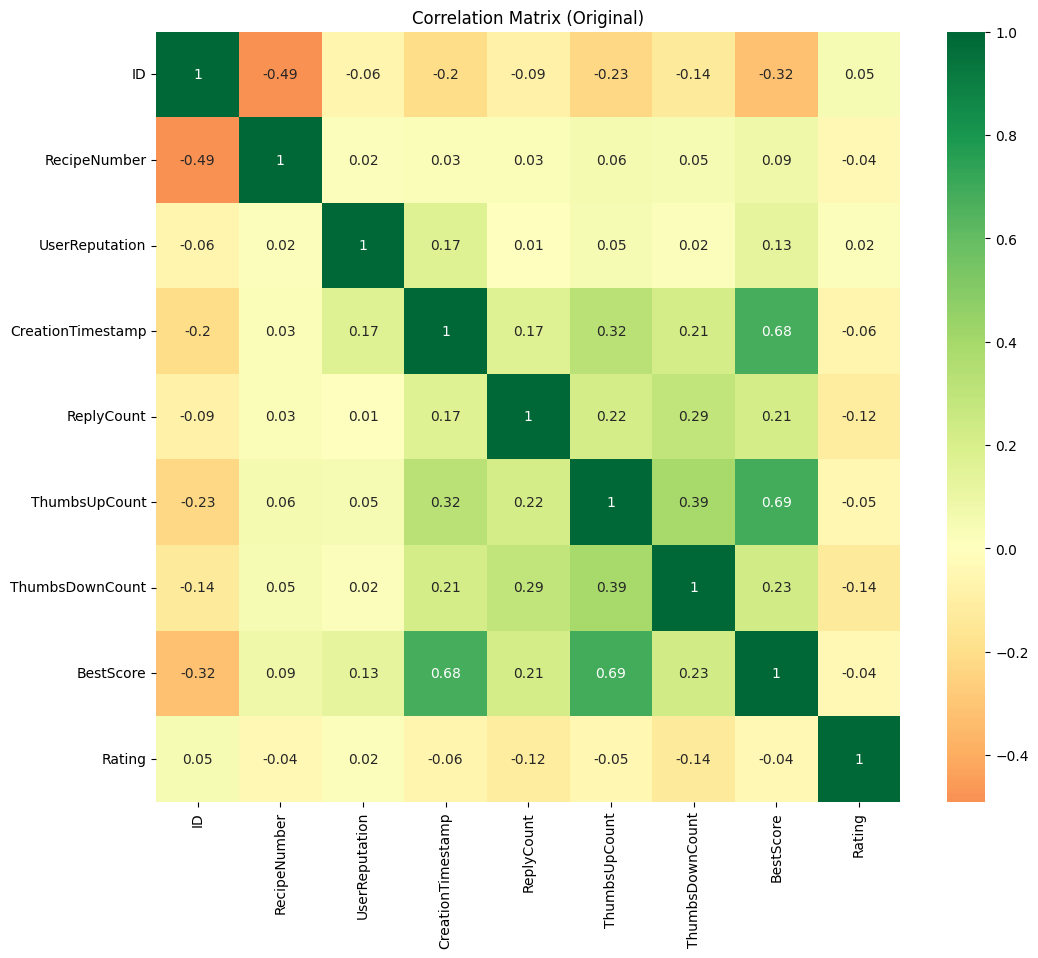

In [59]:
# Correlation Matrix for Original Dataset
train_corr = train.copy()
train_corr.drop(['RecipeCode', 'RecipeName', 'CommentID', 'UserID', 'UserName', 'Recipe_Review', 'Rating'], axis=1, inplace=True)
train_corr['Rating'] = train['Rating'].copy()

plt.figure(figsize=(12, 10))
sns.heatmap(train_corr.corr().round(2), center=0, annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix (Original)')

print('== Correlation with Rating ==\n')
print(abs(train_corr.corr()['Rating']).sort_values(ascending=False))
print()

===== Correlation with Rating ====

Rating                    1.000000
ThumbsDownCount_Binned    0.133795
ReplyCount_Binned         0.122366
DayOfWeek_Cos             0.060369
Hour_Cos                  0.052212
Year                      0.050220
ID                        0.049673
ThumbsUpCount_Binned      0.043243
RecipeNumber              0.043127
Hour_Sin                  0.039874
BestScore                 0.036719
Month_Cos                 0.031929
UserReputation_Binned     0.027575
Month_Sin                 0.026499
UpDownRatio               0.011768
DayOfWeek_Sin             0.000115
Name: Rating, dtype: float64



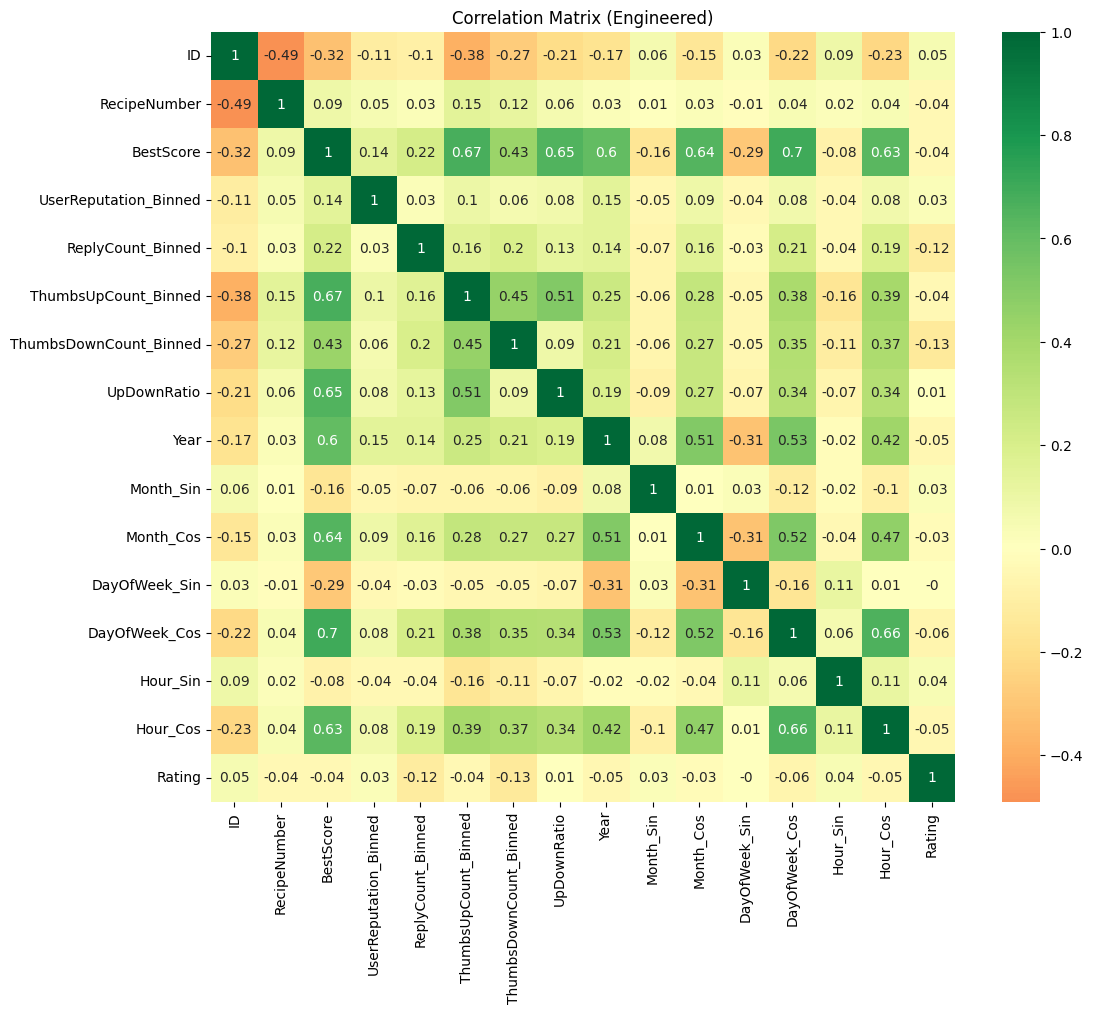

In [60]:
# Correlation Matrix for Engineered Dataset
train_corr = train.copy()
train_corr.drop(['RecipeCode', 'RecipeName', 'CommentID', 'UserID', 'UserName', 'Recipe_Review', 'Rating'], axis=1, inplace=True)
train_corr['UserReputation_Binned'] = train_corr['UserReputation'].apply(categorise_reputation)
train_corr['ReplyCount_Binned'] = train_corr['ReplyCount'].apply(lambda x: 0 if x == 0 else 1)
train_corr['ThumbsUpCount_Binned'] = train_corr['ThumbsUpCount'].apply(lambda x: 0 if x == 0 else 1)
train_corr['ThumbsDownCount_Binned'] = train_corr['ThumbsDownCount'].apply(lambda x: 0 if x == 0 else 1)
train_corr['UpDownRatio'] = (train_corr['ThumbsUpCount'] + 1) / (train_corr['ThumbsDownCount'] + 1)
train_corr['timestamp'] = pd.to_datetime(train_corr['CreationTimestamp'], unit='s')
train_corr['Year'] = train_corr['timestamp'].dt.year
train_corr['Month_Sin'] = train_corr['timestamp'].dt.month.apply(lambda x: np.sin(x / 12 * 2 * np.pi))
train_corr['Month_Cos'] = train_corr['timestamp'].dt.month.apply(lambda x: np.cos(x / 12 * 2 * np.pi))
train_corr['DayOfWeek_Sin'] = train_corr['timestamp'].dt.dayofweek.apply(lambda x: np.sin(x / 7 * 2 * np.pi))
train_corr['DayOfWeek_Cos'] = train_corr['timestamp'].dt.dayofweek.apply(lambda x: np.cos(x / 7 * 2 * np.pi))
train_corr['Hour_Sin'] = train_corr['timestamp'].dt.hour.apply(lambda x: np.sin(x / 7 * 2 * np.pi))
train_corr['Hour_Cos'] = train_corr['timestamp'].dt.hour.apply(lambda x: np.cos(x / 7 * 2 * np.pi))
train_corr.drop(['UserReputation', 'ReplyCount', 'ThumbsUpCount',
                 'ThumbsDownCount', 'CreationTimestamp','timestamp'], axis=1, inplace=True)
train_corr['Rating'] = train['Rating'].copy()

plt.figure(figsize=(12, 10))
sns.heatmap(train_corr.corr().round(2), center=0, annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix (Engineered)')

print('===== Correlation with Rating ====\n')
print(abs(train_corr.corr()['Rating']).sort_values(ascending=False))
print()

The Target variable 'Rating' seems to not have much correlation with any of the numerical or encoded features individually (highest being $\sim\left|-0.134\right|$ correlation coefficient with the feature 'ThumbsDownCount_Binned'). This further signifies the importance of the text features for this modelling project.

<a name='EDA-Conclusion'></a>
## 3.8 EDA Conclusions

Summary of all insights useful for creating the preprocessor next

- **Drop:** RecipeCode (Identifier); CommentID, UserID, UserName (Unique)
- **Normalizer:** ID, RecipeNumber, BestScore
- **Categorise:** UserReputation (0 if <= 1, 1 <= 50, 2 > 50), ReplyCount(0 if 0 else 1)
- **Engineer:** $\log$ of Ratio of ThumbsUpCount and ThumbsDownCount
- **Extraction:** Year, Month, Day of Week and Hour from CreationTimestamp
- **Vectorise:** RecipeName, Recipe_Review (handle missing values and punctuations)

<a name='Preprocessing'></a>
# 4. Preprocessing

In [61]:
from sklearn.preprocessing import Normalizer, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [62]:
numerical_features = ['ID', 'BestScore', 'RecipeNumber', 'UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount']
datetime_features = ['CreationTimestamp']
text_features = ['RecipeName', 'Recipe_Review']
drop_features = ['RecipeCode', 'CommentID', 'UserID', 'UserName']

<a name='Preprocessing-Numerical'></a>
## 4.1 Numerical Features

In [63]:
# Helper to categorise UserReputation
def categorise_reputation(x):
    categories = []
    for reputation in x.values:
        if reputation <= 1:
            categories.append(0)
        elif reputation <= 50:
            categories.append(1)
        else:
            categories.append(2)
    
    return np.array(categories).reshape(-1, 1)

In [64]:
# Helper to binarise ReplyCount
def replied_or_not(x):
    replied = []
    for reply in x.values:
        if reply == 0:
            replied.append(0)
        else:
            replied.append(1)

    return np.array(replied).reshape(-1, 1)

In [65]:
# Helper to engineer ThumbsUpCount to ThumbsDownCount Ratio
def engineer_ratio(x):
    x = x.values
    return np.log10((x[:, 0] + 1) / (x[:, 1] + 1)).reshape(-1, 1)

In [66]:
# Numerical Preprocessor

numerical_ct = ColumnTransformer([
#     ('normalizer', Normalizer(), ['ID', 'BestScore', 'RecipeNumber']),
    ('normalizer', Normalizer(), ['ID', 'BestScore', 'RecipeNumber', 'ThumbsUpCount', 'ThumbsDownCount']),
    ('encode_reputation', FunctionTransformer(categorise_reputation), ['UserReputation']),
    ('encode_reply_count', FunctionTransformer(replied_or_not), ['ReplyCount']),
    ('engineer_ratio', FunctionTransformer(engineer_ratio), ['ThumbsUpCount', 'ThumbsDownCount'])
])

numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('ct', numerical_ct)
]) 
numerical_transformer.set_output(transform='pandas')

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('ct',
                 ColumnTransformer(transformers=[('normalizer', Normalizer(),
                                                  ['ID', 'BestScore',
                                                   'RecipeNumber',
                                                   'ThumbsUpCount',
                                                   'ThumbsDownCount']),
                                                 ('encode_reputation',
                                                  FunctionTransformer(func=<function categorise_reputation at 0x794e47c588b0>),
                                                  ['UserReputation']),
                                                 ('encode_reply_count',
                                                  FunctionTransformer(func=<function replied_or_not at 0x794e47c58dc0>),
                                                  ['ReplyCount']),
                                                 ('engineer_ratio',
                                                  FunctionTransformer(func=<function engineer_ratio at 0x794e47a6c700>),
                                                  ['ThumbsUpCount',
                                                   'ThumbsDownCount'])]))])

<a name='Preprocessing-DateTime'></a>
## 4.2 DateTime Features

In [67]:
# Helpers to extract year, month, day of week and hour from CreationTimestamp
def year_extractor(x):
    years = []
    for timestamp in x:
        year = pd.to_datetime(timestamp, unit='s').year
        years.append(year)
    return np.array(years)

def month_extractor(x):
    months = []
    for timestamp in x:
        month = pd.to_datetime(timestamp, unit='s').month
        months.append(month)
    return np.array(months)

def day_of_week_extractor(x):
    days = []
    for timestamp in x:
        day = pd.to_datetime(timestamp, unit='s').dayofweek
        days.append(day)
    return np.array(days)

def hour_extractor(x):
    hours = []
    for timestamp in x:
        hour = pd.to_datetime(timestamp, unit='s').hour
        hours.append(hour)
    return np.array(hours)

In [68]:
# Sine and Cosine transformers to elaborate periodicity
def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))

def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

In [69]:
# DateTime Preprocessor

year_engineer = Pipeline([
    ('extractor', FunctionTransformer(year_extractor)),
    ('scaler', StandardScaler())
])

month_engineer = Pipeline([
    ('extractor', FunctionTransformer(month_extractor)),
    ('scaler', FeatureUnion([
        ('sin', sin_transformer(period=12)),
        ('cos', cos_transformer(period=12))
    ]))
])

day_of_week_engineer = Pipeline([
    ('extractor', FunctionTransformer(day_of_week_extractor)),
    ('scaler', FeatureUnion([
        ('sin', sin_transformer(period=7)),
        ('cos', cos_transformer(period=7))
    ]))
])

hour_engineer = Pipeline([
    ('extractor', FunctionTransformer(hour_extractor)),
    ('scaler', FeatureUnion([
        ('sin', sin_transformer(period=24)),
        ('cos', cos_transformer(period=24))
    ]))
])

timestamp_engineer = FeatureUnion([
    ('year', year_engineer),
    ('month', month_engineer),
    ('day_of_week', day_of_week_engineer),
    ('hour', hour_engineer)
])

timestamp_transformer = Pipeline([
  ('imputer', SimpleImputer(strategy='median')),
  ('engineer', timestamp_engineer)
])
timestamp_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('engineer',
                 FeatureUnion(transformer_list=[('year',
                                                 Pipeline(steps=[('extractor',
                                                                  FunctionTransformer(func=<function year_extractor at 0x794e47af84c0>)),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('month',
                                                 Pipeline(steps=[('extractor',
                                                                  FunctionTransformer(func=<function month_extractor at 0x794e47af8e50>)),
                                                                 ('s...
                                                                                                  FunctionTransformer(func=<function cos_transformer.<locals>.<lambda> at 0x794e47af92d0>))]))])),
                                                ('hour',
                                                 Pipeline(steps=[('extractor',
                                                                  FunctionTransformer(func=<function hour_extractor at 0x794e47af8f70>)),
                                                                 ('scaler',
                                                                  FeatureUnion(transformer_list=[('sin',
                                                                                                  FunctionTransformer(func=<function sin_transformer.<locals>.<lambda> at 0x794e47af9360>)),
                                                                                                 ('cos',
                                                                                                  FunctionTransformer(func=<function cos_transformer.<locals>.<lambda> at 0x794e47af93f0>))]))]))]))])

<a name='Preprocessing-Text'></a>
## 4.3 Text Features - Latent Semantic Analysis (LSA)

**Latent Semantic Analysis (LSA)** is Natural Language Processing (NLP) techniques that analyses relationships between documents and terms. It is implemented in this notebook in a 3-step manner:

1. **TF-IDF Vectorizer:** converts a collection of documents (corpus) to a matrix of Term Frequency-Inverse Document Frequency values computed as

    $$
    \text{tf-idf}(t, d) = \text{tf}(t, d) \cdot \text{idf}(t)
    $$
    
    where $\text{tf}(t, d)$ represents number of times term $t$ appears in document $d$ and $\text{idf}(t)$ is defined as (with smoothing)
    
    $$
    \text{idf}(t) = \log\left( \frac{1 + n}{1 + \text{df}(t)}\right) + 1
    $$
    
    where $n$ is total number of documents and $\text{df}(t)$ is the number of documents containing term $t$

2. **Singluar Value Decomposition (SVD):** reduces the dimensionality of the vectorized matrix, allowing estimators to compute fast and remain stable

3. **Normalizer:** SVD results are normalized; normalizer converts each document vector to unit norm, scaling the features and highlighting the most important terms in a document

In [70]:
# Custom preprocessor for the TfidfVectorizer
def preprocess_text(text):
    text = text[0]

    if isinstance(text, str):
        # Convert HTML escaped characters - e.g. &#39; -> "'" | &amp; -> "&"
        text = html.unescape(text)
    
        # Capture emojis used in a review and replace them with their Unicode name - e.g. 😍 -> "SMILING FACE WITH HEART-SHAPED EYES"
        emoji_pattern = r'[\U0001F000-\U0001F9FF]|[\U0001F600-\U0001F64F]|[\U0001F300-\U0001F5FF]|[\U0001F680-\U0001F6FF]|[\U00002600-\U000027BF]'

        emojis = re.findall(emoji_pattern, text)
        for emoji in emojis:
            try:
                unicode_name = unicodedata.name(emoji)
                text = text.replace(emoji, ' ' + unicode_name + ' ')
            except ValueError:
                pass
        
        # Handle hyperlinks
        text = re.sub(r'http\S+', ' ', text)
        
        # Convert negative contractions - e.g. "didn't" -> "did not"
        text = re.sub(f"n't", ' not', text)
        
        # Replace special characters with a space
        text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
        # Convert emphasised words - e.g. 'So Gooooooood' -> 'So Good'
        text = re.sub(r'([a-zA-Z])\1+', r'\1\1', text)
        # Trim multiple spaces to single space
        text = re.sub(r'\s+', ' ', text)
        text = text.strip()
        
        # Handle empty strings
        if text == '':
            return 'missing'
        else:
            return text.lower()
    
    # Handles non-string text like np.nan
    else:
        return 'invalid'

In [71]:
# Checking for No. of Components to capture in TruncatedSVD
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

lsa_review = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='')),
    ('tfidf', TfidfVectorizer(preprocessor=preprocess_text, max_features=5_000)),
    ('svd', TruncatedSVD(random_state=random_state))
])

lsa_recipe_name = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='')),
    ('tfidf', TfidfVectorizer(preprocessor=preprocess_text, max_features=5_000)),
    ('svd', TruncatedSVD(random_state=random_state))
])

In [72]:
# Running SVD for Vectorized Recipe_Review
start_time = time.time()
print('LSA for Recipe_Review: ', end='')
lsa_review.set_params(svd__n_components=5000).fit_transform(train[['Recipe_Review']])
end_time = time.time()
print(f'Completed in {end_time - start_time:.2f} s')

LSA for Recipe_Review: Completed in 172.74 s


In [73]:
# Running SVD for vectorized RecipeName
start_time = time.time()
print('LSA for RecipeName: ', end='')
lsa_recipe_name.set_params(svd__n_components=185).fit_transform(train[['RecipeName']])
end_time = time.time()
print(f'Completed in {end_time - start_time:.2f} s')

LSA for RecipeName: Completed in 1.83 s


In [74]:
# Computing the explained variance ratios for the SVDs
review_explained_variance_ratio = np.array([0] + list(lsa_review[-1].explained_variance_ratio_)).cumsum()
recipe_name_explained_variance_ratio = np.array([0] + list(lsa_recipe_name[-1].explained_variance_ratio_)).cumsum()

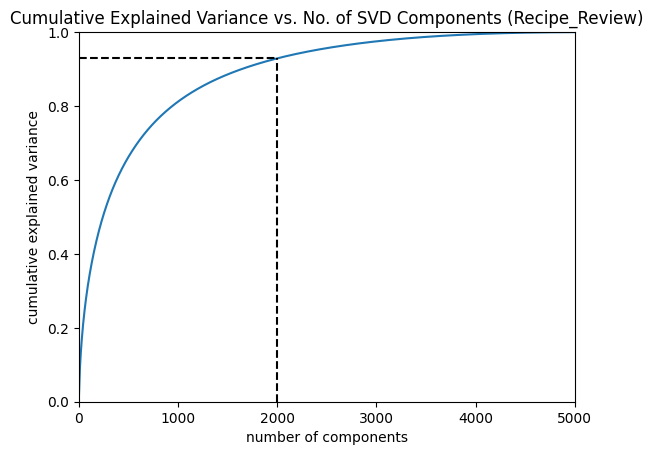

Percentage of Explained Variance with 2000 SVD components: 92.89%


In [75]:
# Plotting Cumulative Explained Variance against No. of Components for Recipe_Review
plt.plot(review_explained_variance_ratio)
plt.hlines(y=0.93, xmin=0, xmax=2000, linestyles='dashed', color='black')
plt.vlines(x=2000, ymin=0, ymax=0.93, linestyles='dashed', color='black')
plt.xlim([0, 5000])
plt.ylim([0, 1])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Cumulative Explained Variance vs. No. of SVD Components (Recipe_Review)')
plt.show()

print(f'Percentage of Explained Variance with 2000 SVD components: {review_explained_variance_ratio[2000] * 100:.2f}%')

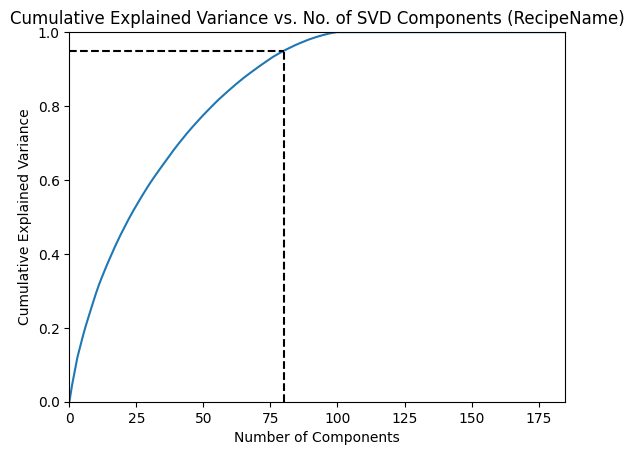

Percentage of Explained Variance with 80 SVD components: 94.96%


In [76]:
# Plotting Cumulative Explained Variance against No. of Components for Recipe_Review
plt.plot(recipe_name_explained_variance_ratio)
plt.hlines(y=0.95, xmin=0, xmax=80, linestyles='dashed', color='black')
plt.vlines(x=80, ymin=0, ymax=0.95, linestyles='dashed', color='black')
plt.xlim([0, 185])
plt.ylim([0, 1])
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. No. of SVD Components (RecipeName)')
plt.show()

print(f'Percentage of Explained Variance with 80 SVD components: {recipe_name_explained_variance_ratio[80] * 100:.2f}%')

As evident from the graphs above, about 2000 and 80 components of TruncatedSVD are able to capture ~93-95% of the explained variance.

Upon running GridSearchCV for TfidfVectorizer parameters using a baseline LogisticRegression model, the following best parameters were achieved.

---

**Recipe_Review Transformer**

Code:
```python
lsa_review_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='')),
    ('tfidf', TfidfVectorizer(preprocessor=preprocess_text)),
    ('svd', TruncatedSVD(n_components=2000, random_state=random_state)),
    ('normalizer', Normalizer()),
    ('classifier', LogisticRegression(max_iter=5000, random_state=random_state))
])

param_grid = {
    'tfidf__lowercase': [True, False],
    'tfidf__stop_words': [None, 'english'],
    'tfidf__max_features': [5000],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]
}

cv = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=random_state)

grid_search = GridSearchCV(lsa_review_pipe, param_grid, cv=cv)
grid_search.fit(X_train[['Recipe_Review]], y_train)

grid_search.best_params_
```

Output:
```
{'tfidf__lowercase': True,
 'tfidf__max_features': 5000,
 'tfidf__ngram_range': (1, 2),
 'tfidf__stop_words': 'english'}
```

---

**RecipeName Transformer**

Code:
```python
lsa_recipe_name_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='')),
    ('tfidf', TfidfVectorizer(preprocessor=preprocess_text)),
    ('svd', TruncatedSVD(n_components=80, random_state=random_state)),
    ('normalizer', Normalizer()),
    ('classifier', LogisticRegression(max_iter=5000, random_state=random_state))
])

param_grid = {
    'tfidf__lowercase': [True, False],
    'tfidf__stop_words': [None, 'english'],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]
}

cv = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=random_state)

grid_search = GridSearchCV(lsa_recipe_name_pipe, param_grid, cv=cv)
grid_search.fit(X_train[['RecipeName]], y_train)

grid_search.best_params_
```

Output:
```
{'tfidf__lowercase': True,
 'tfidf__ngram_range': (1, 1),
 'tfidf__stop_words': None}
```

Thus, now we can define the final text preprocessors

In [77]:
# Best Recipe_Review Transformer
best_params_review = {
    'lowercase': True,
    'max_features': 5000,
    'ngram_range': (1, 2),
    'stop_words': 'english'
}
recipe_review_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='')),
    ('tfidf', TfidfVectorizer(preprocessor=preprocess_text, **best_params_review)),
    ('svd', TruncatedSVD(n_components=2000, random_state=random_state)),
    ('normalizer', Normalizer())
])
recipe_review_transformer

Pipeline(steps=[('imputer', SimpleImputer(fill_value='', strategy='constant')),
                ('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                                 preprocessor=<function preprocess_text at 0x794e47c58af0>,
                                 stop_words='english')),
                ('svd', TruncatedSVD(n_components=2000, random_state=42)),
                ('normalizer', Normalizer())])

In [78]:
# Best RecipeName Transformer
best_params_name = {
    'lowercase': True,
    'ngram_range': (1, 1),
    'stop_words': None
}
recipe_name_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='')),
    ('tfidf', TfidfVectorizer(preprocessor=preprocess_text, **best_params_name)),
    ('svd', TruncatedSVD(n_components=80, random_state=random_state)),
    ('normalizer', Normalizer(norm='l2'))
])
recipe_name_transformer

Pipeline(steps=[('imputer', SimpleImputer(fill_value='', strategy='constant')),
                ('tfidf',
                 TfidfVectorizer(preprocessor=<function preprocess_text at 0x794e47c58af0>)),
                ('svd', TruncatedSVD(n_components=80, random_state=42)),
                ('normalizer', Normalizer())])

In [79]:
# Combined Text Transformer
text_transformer = ColumnTransformer([
    ('review_lsa', recipe_review_transformer, ['Recipe_Review']),
    ('name_lsa', recipe_name_transformer, ['RecipeName'])
])
text_transformer

ColumnTransformer(transformers=[('review_lsa',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='',
                                                                strategy='constant')),
                                                 ('tfidf',
                                                  TfidfVectorizer(max_features=5000,
                                                                  ngram_range=(1,
                                                                               2),
                                                                  preprocessor=<function preprocess_text at 0x794e47c58af0>,
                                                                  stop_words='english')),
                                                 ('svd',
                                                  TruncatedSVD(n_components=2000,
                                                               random_state=42)),
                                                 ('normalizer', Normalizer())]),
                                 ['Recipe_Review']),
                                ('name_lsa',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='',
                                                                strategy='constant')),
                                                 ('tfidf',
                                                  TfidfVectorizer(preprocessor=<function preprocess_text at 0x794e47c58af0>)),
                                                 ('svd',
                                                  TruncatedSVD(n_components=80,
                                                               random_state=42)),
                                                 ('normalizer', Normalizer())]),
                                 ['RecipeName'])])

<a name='Preprocessing-Combined'></a>
## 4.4 Combined Preprocessor

In [80]:
# Compilation of all Transformers
preprocessor = ColumnTransformer([
    ('numerical', numerical_transformer, numerical_features),
    ('datetime', timestamp_transformer, datetime_features),
    ('text', text_transformer, text_features),
    ('drop', 'drop', drop_features)
])
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('ct',
                                                  ColumnTransformer(transformers=[('normalizer',
                                                                                   Normalizer(),
                                                                                   ['ID',
                                                                                    'BestScore',
                                                                                    'RecipeNumber',
                                                                                    'ThumbsUpCount',
                                                                                    'ThumbsDownCount']),
                                                                                  ('encode_reputation',
                                                                                   FunctionTransformer(func=<function categorise_reputation at 0x794e47c588b0>),
                                                                                   ['UserReputatio...
                                                                  Pipeline(steps=[('imputer',
                                                                                   SimpleImputer(fill_value='',
                                                                                                 strategy='constant')),
                                                                                  ('tfidf',
                                                                                   TfidfVectorizer(preprocessor=<function preprocess_text at 0x794e47c58af0>)),
                                                                                  ('svd',
                                                                                   TruncatedSVD(n_components=80,
                                                                                                random_state=42)),
                                                                                  ('normalizer',
                                                                                   Normalizer())]),
                                                                  ['RecipeName'])]),
                                 ['RecipeName', 'Recipe_Review']),
                                ('drop', 'drop',
                                 ['RecipeCode', 'CommentID', 'UserID',
                                  'UserName'])])

<a name='Model-Training-Selection'></a>
# 5. Model Training and Selection

<a name='Train-Validation'></a>
## 5.1 Train-Validation Datasets

Splitting train dataframe to training and validation sets in a stratified manner in the ratio 75:25 respectively

In [81]:
# Splitting in stratified manner
from sklearn.model_selection import train_test_split

X = train.drop(['Rating'], axis=1)
y = train['Rating'].copy()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, stratify=y, random_state=random_state)

In [82]:
# Sanity Check
assert X_train.shape[0] == y_train.shape[0]
assert X_val.shape[0] == y_val.shape[0]
assert X_train.shape[1] == X_val.shape[1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((10227, 14), (10227,), (3409, 14), (3409,))

In [83]:
# Preprocessing the sets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)

In [84]:
# Stratified CV for Cross Validation throughout the notebook
from sklearn.model_selection import StratifiedShuffleSplit

cv = StratifiedShuffleSplit(n_splits=2, test_size=0.25, random_state=random_state)

<a name='Helper'></a>
## 5.2 Helper Functions

In [85]:
from sklearn.model_selection import cross_validate

In [86]:
# Helper function for validation against multiple metrics
def multi_metric_validation_curve(model, X, y, param_name, param_range, metrics, cv):
    if isinstance(metrics, str):
        metrics = [metrics]
        
    train_scores = {metric: [] for metric in metrics}
    test_scores = {metric: [] for metric in metrics}

    for param_val in param_range:
        cv_results = cross_validate(model.set_params(**{param_name: param_val}), X_train_preprocessed, y_train,
                                    scoring=metrics,
                                    cv=cv, return_train_score=True, n_jobs=-1)
        
        for metric in metrics:
            train_scores[metric].append(cv_results[f'train_{metric}'])
            test_scores[metric].append(cv_results[f'test_{metric}'])

    for metric in metrics:
        train_scores[metric] = np.array(train_scores[metric])
        test_scores[metric] = np.array(test_scores[metric])
        
    return train_scores, test_scores

In [87]:
# Helper function to plot Validation Curves
def plot_validation_curve(train_scores, test_scores, model_name, param_name, param_range, metric_name, logx=False, zoom_window=None):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 5))
    
    # Zoomed Out Plot
    ax[0].set_title(f'Validation Curve for {model_name} for {param_name}')
    ax[0].set_xlabel(param_name)
    ax[0].set_ylabel(metric_name)
    ax[0].set_ylim(0, 1)
    
    if logx:
        ax[0].semilogx(param_range, train_scores_mean, label='Training', color='darkorange')
    else:
        ax[0].plot(param_range, train_scores_mean, label='Training', color='darkorange')
    
    ax[0].fill_between(
        param_range,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.2,
        color="darkorange"
    )
    
    if logx:
        ax[0].semilogx(param_range, test_scores_mean, label='Testing', color='blue')
    else:
        ax[0].plot(param_range, test_scores_mean, label='Testing', color='blue')
    
    ax[0].fill_between(
        param_range,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.2,
        color="blue"
    )
    
    ax[0].legend(loc="best")
    
    # Zoomed In Plot
    ax[1].set_title(f'Validation Curve for {model_name} for {param_name} (Zoomed In)')
    ax[1].set_xlabel(param_name)
    ax[1].set_ylabel(metric_name)
    if zoom_window:
        ax[1].set_ylim(zoom_window)
    else:
        ax[1].set_ylim(min(train_scores.min(), test_scores.min()) - 0.05, max(train_scores.max(), test_scores.max()) + 0.05)
    
    if logx:
        ax[1].semilogx(param_range, train_scores_mean, label='Training', color='darkorange')
    else:
        ax[1].plot(param_range, train_scores_mean, label='Training', color='darkorange')
    
    ax[1].fill_between(
        param_range,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.2,
        color="darkorange"
    )
    
    if logx:
        ax[1].semilogx(param_range, test_scores_mean, label='Testing', color='blue')
    else:
        ax[1].plot(param_range, test_scores_mean, label='Testing', color='blue')
    
    ax[1].fill_between(
        param_range,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.2,
        color="blue"
    )
    
    ax[1].legend(loc="best")

    plt.show()

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Dataframe to store metrics of tuned Models for comparison
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision Weighted', 'Recall Weighted', 'F1 Weighted', 'ROC AUC OVR Weighted'])

In [89]:
# Helper function to compute metrics for comparison and update in results dataframe
def compute_comparison_metrics(model_name, model):
    y_train_pred = model.predict(X_train_preprocessed)
    y_val_pred = model.predict(X_val_preprocessed)
    
    y_train_pred_proba = model.predict_proba(X_train_preprocessed)
    y_val_pred_proba = model.predict_proba(X_val_preprocessed)
    
    accuracy = [[accuracy_score(y_train, y_train_pred), accuracy_score(y_val, y_val_pred)]]
    
    prf = [[metric(y_train, y_train_pred, average='weighted'), metric(y_val, y_val_pred, average='weighted')] \
           for metric in [precision_score, recall_score, f1_score]]
    
    roc_auc = [[roc_auc_score(y_train, y_train_pred_proba, average='weighted', multi_class='ovr'),
                roc_auc_score(y_val, y_val_pred_proba, average='weighted', multi_class='ovr')]]
    
    results.loc[len(results.index)] = [model_name] + accuracy + prf + roc_auc

<a name='Model'></a>
## 5.3 Models

<a name='Logistic-Regression'></a>
### 5.3.1 Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import validation_curve

In [91]:
# Tuning Logistic Regression for different regularization strengths
lr = LogisticRegression(max_iter=5000, random_state=random_state, n_jobs=-1)

C_range = np.logspace(-3, 1, 5)

train_scores, test_scores = multi_metric_validation_curve(lr, X_train_preprocessed, y_train,
                                                          param_name='C', param_range=C_range,
                                                          metrics=['neg_log_loss', 'roc_auc_ovr_weighted'], cv=cv)

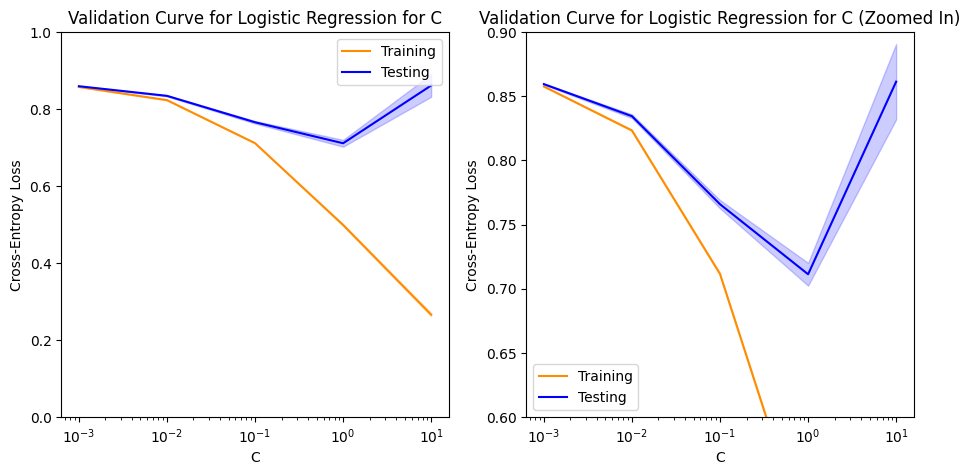

In [92]:
# Plot Validation Curve for Log Loss
plot_validation_curve(-train_scores['neg_log_loss'], -test_scores['neg_log_loss'],
                      'Logistic Regression', 'C', C_range,
                      'Cross-Entropy Loss', logx=True, zoom_window=(0.6, 0.9))

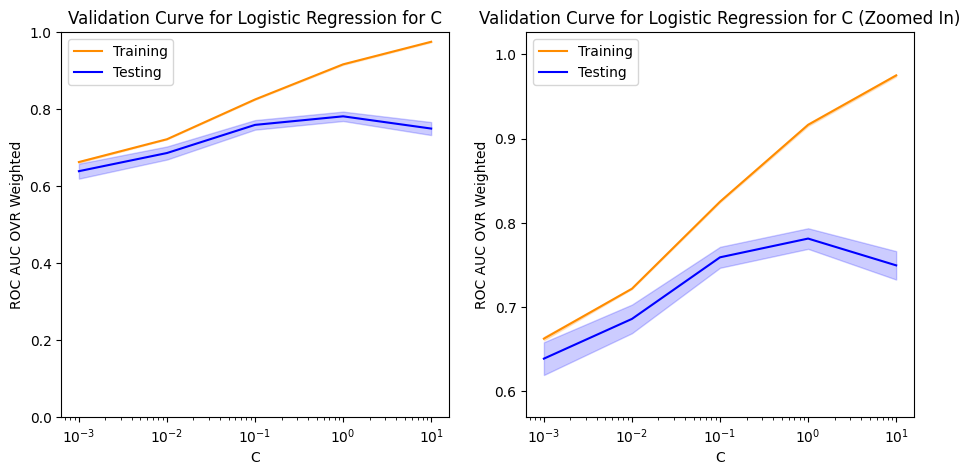

In [93]:
# Plot Validation Curve for ROC AUC
plot_validation_curve(train_scores['roc_auc_ovr_weighted'], test_scores['roc_auc_ovr_weighted'],
                      'Logistic Regression', 'C', C_range,
                      'ROC AUC OVR Weighted', logx=True)

From the graphs above, C=1 seems most appropriate as it is the turning point for both Cross-Entropy Loss and ROC AUC.

In [94]:
# Tuned Logistic Regression
lr = LogisticRegression(C=1, max_iter=5000, random_state=random_state, n_jobs=-1).fit(X_train_preprocessed, y_train)

In [95]:
# Compute metrics for comparison for Logistic Regression
compute_comparison_metrics('Logistic Regression', lr)
results

,Model,Accuracy,Precision Weighted,Recall Weighted,F1 Weighted,ROC AUC OVR Weighted
0,Logistic Regression,"[0.8137283660897624, 0.7811674977999413]","[0.801770568300515, 0.7183804013511351]","[0.8137283660897624, 0.7811674977999413]","[0.769950547690396, 0.7210089138261118]","[0.9055108068567163, 0.7961332042402459]"


<a name='KNN'></a>
### 5.3.2 K-Nearest Neighbors

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

Hyperparameter Tuning KNN

**Code:**
```python
knn = KNeighborsClassifier(n_jobs=-1)

param_grid = {'n_neighbors': range(5, 110, 10), 'metric': ['euclidean', 'manhattan', 'cosine']}

grid_search = GridSearchCV(knn, scoring='roc_auc_ovr_weighted', param_grid=param_grid, cv=cv)
grid_search.fit(X_train_preprocessed, y_train)

best_params = grid_search.best_params_
best_params
```

**Output:**
```
{'metric': 'cosine', 'n_neighbors': 25}
```

In certain text analysis models, Cosine Similarity is used to score how close two texts are that post-vectortization, just like using TfidfVectorizer for LSA in this notebook. Hence, Cosine Distance, which is defined as
$$
\text{Cosine Distance}(x_1, x_2) = 1 - \text{Cosine Similarity}(x_1, x_2) = 1 - \frac{x_1x_2^\top}{\|x_1\|\|x_2\|}
$$
is also being used to train and validate K-Nearest Neighbors.

In [97]:
# Tuned KNN
best_params = {'metric': 'cosine', 'n_neighbors': 25}
knn = KNeighborsClassifier(**best_params, n_jobs=-1).fit(X_train_preprocessed, y_train)

In [98]:
# Compute metrics for comparison for KNN
compute_comparison_metrics('K Nearest Neighbors', knn)
results

,Model,Accuracy,Precision Weighted,Recall Weighted,F1 Weighted,ROC AUC OVR Weighted
0,Logistic Regression,"[0.8137283660897624, 0.7811674977999413]","[0.801770568300515, 0.7183804013511351]","[0.8137283660897624, 0.7811674977999413]","[0.769950547690396, 0.7210089138261118]","[0.9055108068567163, 0.7961332042402459]"
1,K Nearest Neighbors,"[0.7665004400117337, 0.7650337342329129]","[0.6565101310182754, 0.6457023238611286]","[0.7665004400117337, 0.7650337342329129]","[0.6760792902218312, 0.6733775808954744]","[0.7609821889053148, 0.6499514510314031]"


<a name='SVC'></a>
### 5.3.3 Support Vector Classifier

In [99]:
from sklearn.svm import SVC

Hyperparameter Tuning SVC

**Code:**
```python
svc = SVC(random_state=random_state)
param_grid = {
    'C': np.logspace(-3, 1, 5),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

grid_search = GridSearchCV(svc, param_grid=param_grid, cv=cv)
grid_search.fit(X_train_preprocessed, y_train)

best_params = grid_search.best_params_
```

**Output:**
```
{'C': 10, 'kernel': 'rbf'}
```

Post running the GridSearchCV, RBF kernel provided the best overall scores across different values of C; however, C=10 came out as best param for C, which is a corner case of ```np.logspace(-3, 1, 5)```. Thus, a validation plot for a larger range of C is plot next, choosing kernel as RBF.

**Code:**
```python
# Tuning SVC for various regularization strengths given Radial-Basis Function kernel
svc = SVC(kernel='rbf', probability=True, random_state=random_state)

C_range = np.logspace(-1, 2, 4)

train_scores, test_scores = multi_metric_validation_curve(svc, X_train_preprocessed, y_train,
                                                          param_name='C', param_range=C_range,
                                                          metrics=['f1_weighted', 'roc_auc_ovr_weighted'],
                                                          cv=cv)
```

---

**Code:**
```python
# Plot Validation Curve for F1 Score
plot_validation_curve(train_scores['f1_weighted'], test_scores['f1_weighted'],
                      'RBF SVC', 'C', C_range,
                      'Weighted F1', logx=True)
```

**Output:**

<img src='https://drive.google.com/thumbnail?id=1wiCLzjOb1i1lrlx2rcm85Ys7Msyjbwu3&sz=w1000' width='1000' alt='SVC Validation Curve for F1 Score'>

[Click to Open Image](https://drive.google.com/file/d/1wiCLzjOb1i1lrlx2rcm85Ys7Msyjbwu3/view?usp=drive_link)

---

**Code:**
```python
# Plot Validation Curve for ROC AUC
plot_validation_curve(train_scores['roc_auc_ovr_weighted'], test_scores['roc_auc_ovr_weighted'],
                      'RBF SVC', 'C', C_range,
                      'ROC AUC OVR Weighted', logx=True)
```

**Output:**

<img src='https://drive.google.com/thumbnail?id=1H5vqyj8l-WJ7famvFNjnnj3g0Az4gj8f&sz=w1000' width='1000' alt='SVC Validation Curve for ROC AUC against C'>

[Click to Open Image](https://drive.google.com/file/d/1H5vqyj8l-WJ7famvFNjnnj3g0Az4gj8f/view?usp=drive_link)

Given the shape of graphs and likeliness of overfitting, ideal C should lie in the range [1, 10]. Thus, even though C=10 seems best, C=5 is considered for building the model.

In [100]:
# Tuned SVC
best_params = {'C':5, 'kernel': 'rbf'}
svc = SVC(**best_params, probability=True, random_state=random_state).fit(X_train_preprocessed, y_train)

In [101]:
# Compute metrics for comparison for SVC
compute_comparison_metrics('SVC', svc)
results

,Model,Accuracy,Precision Weighted,Recall Weighted,F1 Weighted,ROC AUC OVR Weighted
0,Logistic Regression,"[0.8137283660897624, 0.7811674977999413]","[0.801770568300515, 0.7183804013511351]","[0.8137283660897624, 0.7811674977999413]","[0.769950547690396, 0.7210089138261118]","[0.9055108068567163, 0.7961332042402459]"
1,K Nearest Neighbors,"[0.7665004400117337, 0.7650337342329129]","[0.6565101310182754, 0.6457023238611286]","[0.7665004400117337, 0.7650337342329129]","[0.6760792902218312, 0.6733775808954744]","[0.7609821889053148, 0.6499514510314031]"
2,SVC,"[0.9078908770900558, 0.7811674977999413]","[0.9152171442703476, 0.7258961084032665]","[0.9078908770900558, 0.7811674977999413]","[0.8982784123240224, 0.7198772523216851]","[0.9867725558118989, 0.7926257283506197]"


<a name='DT'></a>
### 5.3.4 Decision Tree

In [102]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [103]:
# Training a fully grown Decision Tree
dt = DecisionTreeClassifier(random_state=random_state).fit(X_train_preprocessed, y_train)

In [104]:
# Checking dimensions of a fully grown tree
dt.get_depth(), dt.get_n_leaves()

(134, 1388)

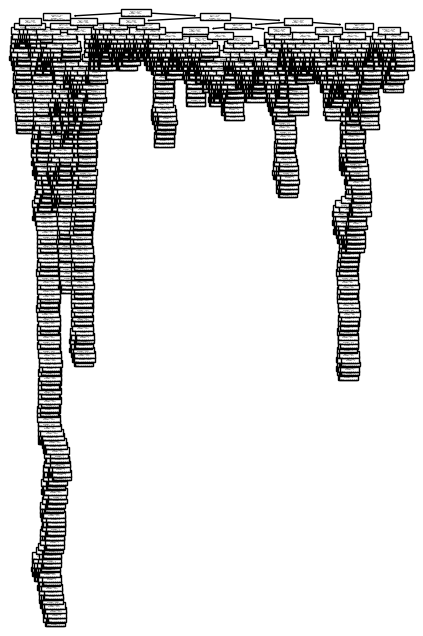

In [105]:
# Plot the Decision Tree
plt.figure(figsize=(5, 8))
plot_tree(dt)
plt.show()

A Decison Tree with long 'branches', depth of 134, and 1388 leaf nodes for just 6 classes seems excessive and very prone to overfitting as it may try to fit the noise. Thus, the tree must be pruned. In this notebook, the Decision Tree will be **post-pruned**.

#### **Post-pruning the Decision Tree with Minimal Cost-Complexity Pruning**

Pruning is done to prevent the tree from overfitting. The Cost-Complexity measure $R_{\alpha}(T)$ for a given Tree $T$ and a complexity parameter $\alpha \geq 0$ is

$$
R_{\alpha}(T) = R(T) + \alpha|\tilde{T}|
$$

where $|\tilde{T}|$ is number of terminal nodes and $R(T)$ is the total weighted sample impurity of the terminal nodes. Minimal Cost-Complexity Pruning tries to find the subtree of $T$ that minimizes $R_{\alpha}(T)$. 

In [106]:
# Capturing Impurities for various CCP alphas
path = dt.cost_complexity_pruning_path(X_train_preprocessed, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

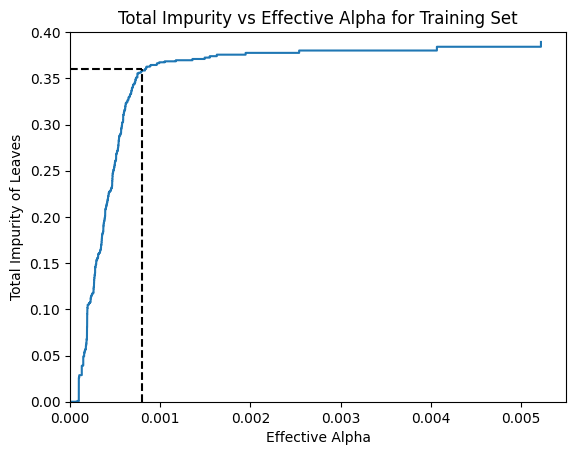


Elbow at Alpha~=0.0008


In [107]:
# Plot the effect of CCP alpha on the Impurity
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], drawstyle="steps-post")
ax.set_xlabel("Effective Alpha")
ax.set_ylabel("Total Impurity of Leaves")
ax.vlines(x=0.0008, ymin=0, ymax=0.36, color='black', linestyles='dashed')
ax.hlines(y=0.36, xmin=0, xmax=0.0008, color='black', linestyles='dashed')
ax.set_xlim(0, 0.0055)
ax.set_ylim(0, 0.4)
ax.set_title("Total Impurity vs Effective Alpha for Training Set")
plt.show()

print('\nElbow at Alpha~=0.0008')

**Code:**
```python
# Training Decision Tree for a few chosen CCP alphas
alphas = [0, 0.0005, 0.0008, 0.001, 0.005]

dts = []
for ccp_alpha in alphas:
    dt = DecisionTreeClassifier(random_state=random_state, ccp_alpha=ccp_alpha).fit(X_train_preprocessed, y_train)
    dts.append(dt)
```

---

**Code:**
```python
# Plotting effect of CCP alpha on Decision Tree Depth and Number of Nodes
node_counts = [dt.tree_.node_count for dt in dts]
depth = [dt.tree_.max_depth for dt in dts]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax[0].plot(alphas, node_counts, marker="o")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of Nodes")
ax[0].set_title("Number of Nodes vs Alpha")

ax[1].plot(alphas, depth, marker="o")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of Tree")
ax[1].set_title("Depth vs Alpha")

plt.show()
```

**Output:**

<img src='https://drive.google.com/thumbnail?id=1t02qH6wgxk16Dh8m1e11AJpAdqZiDpbv&sz=w1000' width='1000' alt='Effect of ccp_alpha on number of nodes and depth of DT'>

[Click to Open Image](https://drive.google.com/file/d/1t02qH6wgxk16Dh8m1e11AJpAdqZiDpbv/view?usp=drive_link)

The plot above shows how ccp_alpha itself affects the number of nodes and depth of a Decision Tree and thus, might be an effective way to prune it.

**Code:**
```python
# Tuning Decision Tree for various CCP alphas
dt = DecisionTreeClassifier(random_state=random_state)

ccp_alpha_range = [0, 0.0005, 0.0008, 0.001, 0.005]

train_scores, test_scores = multi_metric_validation_curve(dt, X_train_preprocessed, y_train,
                                                          param_name='ccp_alpha', param_range=ccp_alpha_range,
                                                          metrics=['neg_log_loss', 'f1_weighted', 'roc_auc_ovr_weighted'],
                                                          cv=cv)
```

---

**Code:**
```python
# Plot Validation Curve for Log Loss
plot_validation_curve(-train_scores['neg_log_loss'], -test_scores['neg_log_loss'],
                      'Decision Tree', 'CCP Alpha', ccp_alpha_range,
                      'Cross-Entropy Loss')
```

**Output:**

<img src='https://drive.google.com/thumbnail?id=1uPUSdQQu6zO60dB8UobTqpnEN7eFKioh&sz=w1000' width='1000' alt='DT Validation Curve for LogLoss against ccp_alpha'>

[Click to Open Image](https://drive.google.com/file/d/1uPUSdQQu6zO60dB8UobTqpnEN7eFKioh/view?usp=drive_link)

---

**Code:**

```python
# Plot Validation Curve for F1 Score
plot_validation_curve(train_scores['f1_weighted'], test_scores['f1_weighted'],
                      'Decision Tree', 'CCP Alpha', ccp_alpha_range,
                      'F1 Weighted')
```

**Output:**

<img src='https://drive.google.com/thumbnail?id=1NetNG86Nw8zSE7zoWAHycAF2dtSgS8Eg&sz=w1000' width='1000' alt='DT Validation Curve for F1 against ccp_alpha'>

[Click to Open Image](https://drive.google.com/file/d/1NetNG86Nw8zSE7zoWAHycAF2dtSgS8Eg/view?usp=drive_link)

___

**Code:**
```python
# Plot Validation Curve for ROC AUC
plot_validation_curve(train_scores['roc_auc_ovr_weighted'], test_scores['roc_auc_ovr_weighted'],
                      'Decision Tree', 'CCP Alpha', ccp_alpha_range,
                      'ROC AUC OVR Weighted')
```

**Output:**

<img src='https://drive.google.com/thumbnail?id=10t0K4WXwY3AvZOLLA4UAgAabKvt2_t2f&sz=w1000' width='1000' alt='DT Validation Curve for ROC AUC against ccp_alpha'>

[Click to Open Image](https://drive.google.com/file/d/10t0K4WXwY3AvZOLLA4UAgAabKvt2_t2f/view?usp=drive_link)

From the plots above, ccp_alpha=0.001 seems appropriate for relatively good in terms of Weighted F1 and ROC AUC; furthermore, Cross-Entropy Loss approximately stagnates post ccp_alpha=0.001.

In [108]:
# Tuned Decision Tree
dt = DecisionTreeClassifier(ccp_alpha=0.001, random_state=random_state).fit(X_train_preprocessed, y_train)

In [109]:
# Compute metrics for comparison for Decision Tree
compute_comparison_metrics('Decision Tree', dt)
results

,Model,Accuracy,Precision Weighted,Recall Weighted,F1 Weighted,ROC AUC OVR Weighted
0,Logistic Regression,"[0.8137283660897624, 0.7811674977999413]","[0.801770568300515, 0.7183804013511351]","[0.8137283660897624, 0.7811674977999413]","[0.769950547690396, 0.7210089138261118]","[0.9055108068567163, 0.7961332042402459]"
1,K Nearest Neighbors,"[0.7665004400117337, 0.7650337342329129]","[0.6565101310182754, 0.6457023238611286]","[0.7665004400117337, 0.7650337342329129]","[0.6760792902218312, 0.6733775808954744]","[0.7609821889053148, 0.6499514510314031]"
2,SVC,"[0.9078908770900558, 0.7811674977999413]","[0.9152171442703476, 0.7258961084032665]","[0.9078908770900558, 0.7811674977999413]","[0.8982784123240224, 0.7198772523216851]","[0.9867725558118989, 0.7926257283506197]"
3,Decision Tree,"[0.7650337342329129, 0.7629803461425638]","[0.6620624406593635, 0.6449394581105806]","[0.7650337342329129, 0.7629803461425638]","[0.6719939800986534, 0.6708080812418546]","[0.7025567597325281, 0.6865377676601551]"


<a name='Random-Forest'></a>
### 5.3.5 Random Forest - Bagging

In [110]:
from sklearn.ensemble import RandomForestClassifier

Since ccp_alpha=0.001 gives best Decision Tree, the same value is considered to train the Random Forest. Also, boostrapping is chosen with a max_features of 'sqrt' of total number of features.

In [111]:
# Tuning Random Forest for number of estimators
rf = RandomForestClassifier(bootstrap=True, max_features='sqrt', ccp_alpha=0.001, n_jobs=-1, random_state=random_state)

n_estimators_range = [5, 10, 20, 50, 100]

train_scores, test_scores = multi_metric_validation_curve(rf, X_train_preprocessed, y_train,
                                                          param_name='n_estimators', param_range=n_estimators_range,
                                                          metrics=['neg_log_loss', 'roc_auc_ovr_weighted'],
                                                          cv=cv)

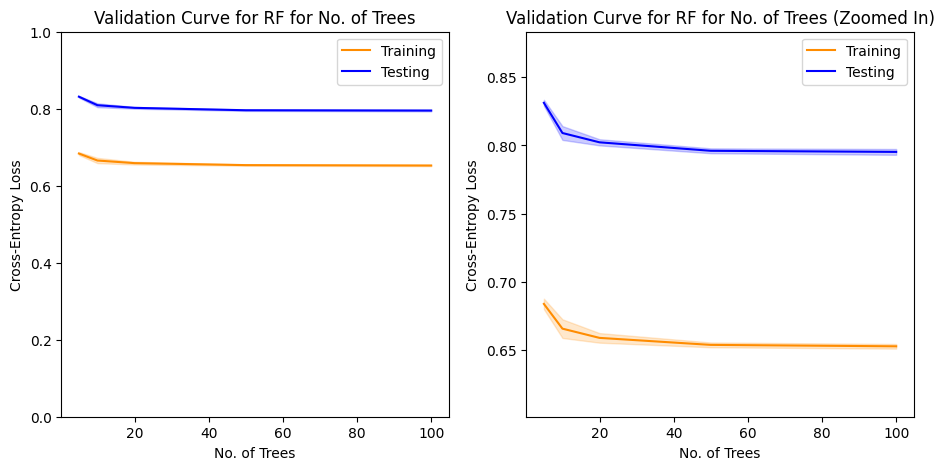

In [112]:
# Plot Validation Curve for Log Loss
plot_validation_curve(-train_scores['neg_log_loss'], -test_scores['neg_log_loss'],
                      'RF', 'No. of Trees', n_estimators_range,
                      'Cross-Entropy Loss')

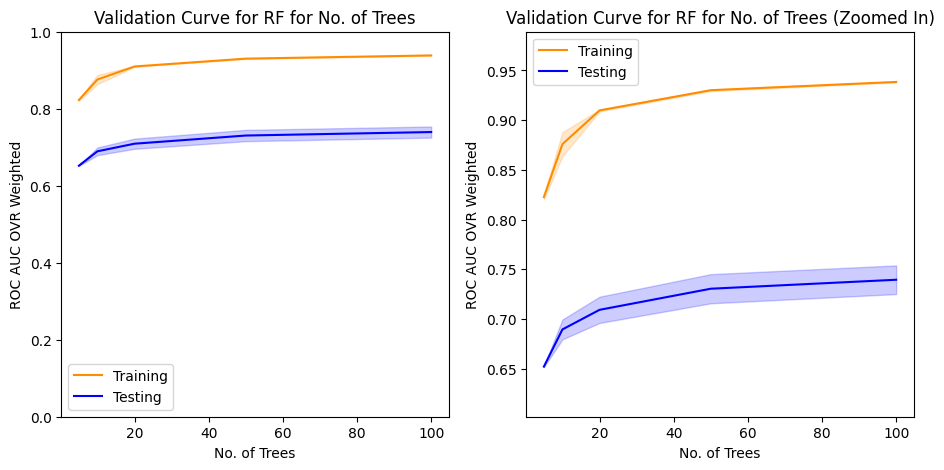

In [113]:
# Plot Validation Curve for ROC AUC
plot_validation_curve(train_scores['roc_auc_ovr_weighted'], test_scores['roc_auc_ovr_weighted'],
                      'RF', 'No. of Trees', n_estimators_range,
                      'ROC AUC OVR Weighted')

Cross-Entropy Loss stagnates post-20 estimators, yet ROC AUC is maximum for 100 estimators. Thus, a value in between 20 and 100 (n_estimators=50) is considered.

In [114]:
# Tuned Random Forest
rf = RandomForestClassifier(n_estimators=50, bootstrap=True, max_features='sqrt',
                            ccp_alpha=0.001, n_jobs=-1, random_state=random_state).fit(X_train_preprocessed, y_train)

In [115]:
# Compute metrics for comparison for Random Forest
compute_comparison_metrics('Random Forest', rf)
results

,Model,Accuracy,Precision Weighted,Recall Weighted,F1 Weighted,ROC AUC OVR Weighted
0,Logistic Regression,"[0.8137283660897624, 0.7811674977999413]","[0.801770568300515, 0.7183804013511351]","[0.8137283660897624, 0.7811674977999413]","[0.769950547690396, 0.7210089138261118]","[0.9055108068567163, 0.7961332042402459]"
1,K Nearest Neighbors,"[0.7665004400117337, 0.7650337342329129]","[0.6565101310182754, 0.6457023238611286]","[0.7665004400117337, 0.7650337342329129]","[0.6760792902218312, 0.6733775808954744]","[0.7609821889053148, 0.6499514510314031]"
2,SVC,"[0.9078908770900558, 0.7811674977999413]","[0.9152171442703476, 0.7258961084032665]","[0.9078908770900558, 0.7811674977999413]","[0.8982784123240224, 0.7198772523216851]","[0.9867725558118989, 0.7926257283506197]"
3,Decision Tree,"[0.7650337342329129, 0.7629803461425638]","[0.6620624406593635, 0.6449394581105806]","[0.7650337342329129, 0.7629803461425638]","[0.6719939800986534, 0.6708080812418546]","[0.7025567597325281, 0.6865377676601551]"
4,Random Forest,"[0.7605358365111958, 0.7606336168964506]","[0.5784147586177845, 0.5785634991529763]","[0.7605358365111958, 0.7606336168964506]","[0.6570894458632692, 0.6572219155656435]","[0.82586540651037, 0.7419278250737493]"


<a name='XGBoost'></a>
### 5.3.6 XGBoostClassifier - Boosting

In [116]:
from xgboost import XGBClassifier

Given the importance of parameters for a Gradient Boosting Algorithm, the XGBClassifier will first be tuned for learning_rate, followed by the n_estimators; both of these parameters will be further used to tune tree-specific parameters, such as max_depth.

**Code:**
```python
# Tuning XGBClassifier for learning_rate
xgb = XGBClassifier(objective='multi:softmax', n_jobs=-1, random_state=random_state)
learning_rate_range = [0.005, 0.01, 0.05, 0.1]

train_scores, test_scores = multi_metric_validation_curve(xgb, X_train_preprocessed, y_train,
                                                          param_name='learning_rate', param_range=learning_rate_range,
                                                          metrics=['neg_log_loss', 'roc_auc_ovr_weighted'],
                                                          cv=cv)
```

---

**Code:**
```python
# Plot validation curve for Cross-Entropy Loss
plot_validation_curve(-train_scores['neg_log_loss'], -test_scores['neg_log_loss'],
                      'XGBoost', 'learning_rate', learning_rate_range,
                      'Cross-Entropy Loss')
```

**Output:**

<img src='https://drive.google.com/thumbnail?id=103cMXUlL-Ud6euAbVfHyr8ztjfMfe6Z9&sz=w1000' width='1000' alt='XGB Validation Curve for LogLoss against learning_rate'>

[Click to Open Image](https://drive.google.com/file/d/103cMXUlL-Ud6euAbVfHyr8ztjfMfe6Z9/view?usp=drive_link)

---

**Code:**
```python
# Plot validation curve for ROC AUC
plot_validation_curve(train_scores['roc_auc_ovr_weighted'], test_scores['roc_auc_ovr_weighted'],
                      'XGBoost', 'learning_rate', learning_rate_range,
                      'ROC AUC OVR Weighted')
```

**Output:**

<img src='https://drive.google.com/thumbnail?id=1YhXhf8v3TRdJJku4aPnwUqrSsg13LN-7&sz=w1000' width='1000' alt='XGB Validation Curve for ROC AUC against learning_rate'>

[Click to Open Image](https://drive.google.com/file/d/1YhXhf8v3TRdJJku4aPnwUqrSsg13LN-7/view?usp=drive_link)

It is evident from the turning point in both the plots that learning_rate=0.05 seems most suitable.

Next, XGBClassifier will be tuned for n_estimators given learning_rate=0.05.

**Code:**
```python
# Tuning XGBClassifier for number of estimators
xgb = XGBClassifier(objective='multi:softmax', learning_rate=0.05, n_jobs=-1, random_state=random_state)
n_estimators_range = [10, 20, 50, 80, 100, 150, 200]

train_scores, test_scores = multi_metric_validation_curve(xgb, X_train_preprocessed, y_train,
                                                          param_name='n_estimators', param_range=n_estimators_range,
                                                          metrics=['neg_log_loss', 'roc_auc_ovr_weighted'],
                                                          cv=cv)
```

---

**Code:**
```python
# Plot validation curve for Cross-Entropy Loss
plot_validation_curve(-train_scores['neg_log_loss'], -test_scores['neg_log_loss'],
                      'XGBoost', 'n_estimators', n_estimators_range,
                      'Cross-Entropy Loss')
```

**Output:**

<img src='https://drive.google.com/thumbnail?id=1crIYRxnC3ZjBZBgwEPxjps7CeFXkuwbm&sz=w1000' width='1000' alt='XGB Validation Curve for LogLoss against n_estimators'>

[Click to Open Image](https://drive.google.com/file/d/1crIYRxnC3ZjBZBgwEPxjps7CeFXkuwbm/view?usp=drive_link)

---

**Code:**
```python
# Plot validation curve for ROC AUC
plot_validation_curve(train_scores['roc_auc_ovr_weighted'], test_scores['roc_auc_ovr_weighted'],
                      'XGBoost', 'n_estimators', n_estimators_range,
                      'ROC AUC OVR Weighted')
```

**Output:**

<img src='https://drive.google.com/thumbnail?id=1sePrqD4hijFByBtUfUBfRomP_nM75-jA&sz=w1000' width='1000' alt='XGB Validation Curve for ROC AUC against n_estimators'>

[Click to Open Image](https://drive.google.com/file/d/1sePrqD4hijFByBtUfUBfRomP_nM75-jA/view?usp=drive_link)

Considering the Cross-Entropy Loss plot, the testing loss starts to increase after n_estimators=100, indicating overfitting. Similarly, for the ROC AUC plot, the metric attains maximum value at n_estimators=100 and remains constant afterwards. Thus, choosing n_estimators=100. 

Following is tuning for the tree-specific parameter 'max_depth', given learning_rate=0.05 and n_estimators=100.

**Code:**
```python
# Tuning XGBClassifier for max_depth
xgb = XGBClassifier(objective='multi:softmax', learning_rate=0.05, n_estimators=100, n_jobs=-1, random_state=random_state)
max_depth_range = [5, 10, 15, 20]

train_scores, test_scores = multi_metric_validation_curve(xgb, X_train_preprocessed, y_train,
                                                          param_name='max_depth', param_range=max_depth_range,
                                                          metrics=['neg_log_loss', 'roc_auc_ovr_weighted'],
                                                          cv=cv)
```

---

**Code:**
```python
# Plot validation curve for Cross-Entropy Loss
plot_validation_curve(-train_scores['neg_log_loss'], -test_scores['neg_log_loss'],
                      'XGBoost', 'max_depth', max_depth_range,
                      'Cross-Entropy Loss')
```

**Output:**

<img src='https://drive.google.com/thumbnail?id=1paW_uTRsXi-G035FclgyY0J0V-LfoXA0&sz=w1000' width='1000' alt='XGB Validation Curve for LogLoss against max_depth'>

[Click to Open Image](https://drive.google.com/file/d/1paW_uTRsXi-G035FclgyY0J0V-LfoXA0/view?usp=drive_link)

___

**Code:**
```python
# Plot validation curve for ROC AUC
plot_validation_curve(train_scores['roc_auc_ovr_weighted'], test_scores['roc_auc_ovr_weighted'],
                      'XGBoost', 'max_depth', max_depth_range,
                      'ROC AUC OVR Weighted')
```

**Output:**

<img src='https://drive.google.com/thumbnail?id=1kcF0ACC2RaDm-tEYcdpWFJu2N5GznvMi&sz=w1000' width='1000' alt='XGB Validation Curve for ROC AUC against max_depth'>

[Click to Open Image](https://drive.google.com/file/d/1kcF0ACC2RaDm-tEYcdpWFJu2N5GznvMi/view?usp=drive_link)

Though, Training loss decreases, Testing loss increases post max_depth=5, signalling overfitting.

Thus, the tuned classifier has learning_rate=0.05, n_estimators=100, and max_depth=5.

In [117]:
# Tuned XGBClassifier
xgb = XGBClassifier(objective='multi:softmax',
                    learning_rate=0.05, n_estimators=100, max_depth=5,
                    n_jobs=-1, random_state=random_state).fit(X_train_preprocessed, y_train)

In [118]:
# Compute metrics for comparison for XGBClassifier
compute_comparison_metrics('XGBoost', xgb)
results

,Model,Accuracy,Precision Weighted,Recall Weighted,F1 Weighted,ROC AUC OVR Weighted
0,Logistic Regression,"[0.8137283660897624, 0.7811674977999413]","[0.801770568300515, 0.7183804013511351]","[0.8137283660897624, 0.7811674977999413]","[0.769950547690396, 0.7210089138261118]","[0.9055108068567163, 0.7961332042402459]"
1,K Nearest Neighbors,"[0.7665004400117337, 0.7650337342329129]","[0.6565101310182754, 0.6457023238611286]","[0.7665004400117337, 0.7650337342329129]","[0.6760792902218312, 0.6733775808954744]","[0.7609821889053148, 0.6499514510314031]"
2,SVC,"[0.9078908770900558, 0.7811674977999413]","[0.9152171442703476, 0.7258961084032665]","[0.9078908770900558, 0.7811674977999413]","[0.8982784123240224, 0.7198772523216851]","[0.9867725558118989, 0.7926257283506197]"
3,Decision Tree,"[0.7650337342329129, 0.7629803461425638]","[0.6620624406593635, 0.6449394581105806]","[0.7650337342329129, 0.7629803461425638]","[0.6719939800986534, 0.6708080812418546]","[0.7025567597325281, 0.6865377676601551]"
4,Random Forest,"[0.7605358365111958, 0.7606336168964506]","[0.5784147586177845, 0.5785634991529763]","[0.7605358365111958, 0.7606336168964506]","[0.6570894458632692, 0.6572219155656435]","[0.82586540651037, 0.7419278250737493]"
5,XGBoost,"[0.8481470616994231, 0.7679671457905544]","[0.8726308430508367, 0.6822466139017057]","[0.8481470616994231, 0.7679671457905544]","[0.8173477028676376, 0.6796485577716694]","[0.974352585153382, 0.7701523815382949]"


<a name='MLP'></a>
### 5.3.7 Multi-Layer Perceptron (Neural Network)

In [119]:
from sklearn.neural_network import MLPClassifier

Starting with a simple MLP with 1 Input, 2 Hidden, and 1 Output Layers. The number of neurons per hidden is considered as half of that in the previous neuron, i.e. Hidden Layer-1 has 1000 (\~ # of Features/2 = 2093/2) and Hidden Layer-2 has 500 (\~1000/2) neurons.

Moreover, after testing with various activation functions, including Sigmoid and Tanh, Rectified Linear Unit (ReLU) for the hidden layers gave the most promising results.

$$
\text{ReLU}(z) = \max(0, z)
$$

Scikit-learn automatically assigns the activation function of the output layer as Softmax for a multi-class classification problem.

$$
\sigma(z)_i = \frac{e^{z_i}}{\sum_{k=1}^{K}{e}^{z_k}}
$$

The solver is chosen as 'Adam', which genrally works well on large datasets in terms of training time and validation score. Moreover, early_stopping=True has also been enabled with validation_fraction=0.1 so that model is able to generalize well and prevent overfitting.

In [120]:
# Tuning Neural Network for regularization strength
mlp = MLPClassifier(hidden_layer_sizes=(1000, 500), solver='adam',
                    early_stopping=True, validation_fraction=0.1, random_state=random_state)
alpha_range = np.logspace(-4, 1, 6)

train_scores, test_scores = multi_metric_validation_curve(mlp, X_train_preprocessed, y_train,
                                                          param_name='alpha', param_range=alpha_range,
                                                          metrics=['neg_log_loss', 'roc_auc_ovr_weighted'],
                                                          cv=cv)

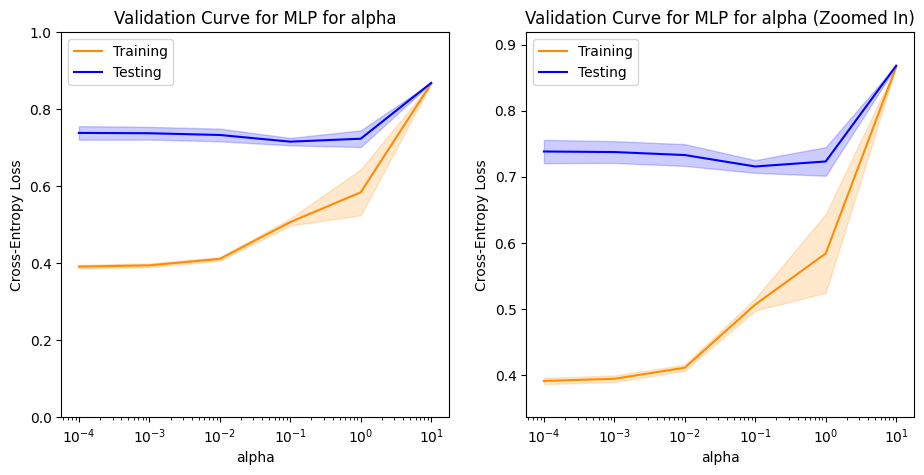

In [121]:
# Plot validation curve for Cross-Entropy Loss
plot_validation_curve(-train_scores['neg_log_loss'], -test_scores['neg_log_loss'],
                      'MLP', 'alpha', alpha_range,
                      'Cross-Entropy Loss', logx=True)

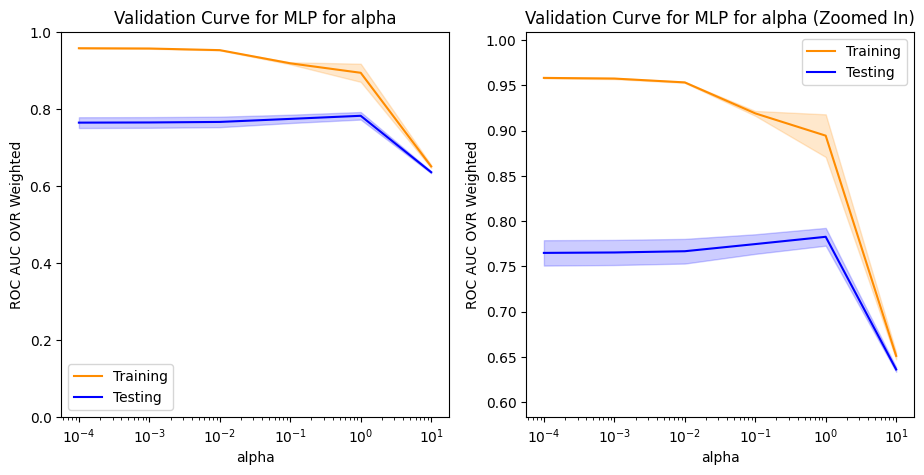

In [122]:
# Plot validation curve for ROC AUC
plot_validation_curve(train_scores['roc_auc_ovr_weighted'], test_scores['roc_auc_ovr_weighted'],
                      'MLP', 'alpha', alpha_range,
                      'ROC AUC OVR Weighted', logx=True)

For the Cross-Entropy Loss plot, minimum test loss occurs between alpha=0.1 and alpha=1; however, the training loss increases in this range. ROC AUC is also roughly constant till alpha=1 (peaking at alpha=1).

Interestingly, for alpha=10, both train and test losses increase sharply, while ROC AUC values decrease sharply. This suggests underfitting of the MLP.

Therefore, alpha=0.1 is considered ahead as it minimizes the test loss.

In [123]:
# Tuned Neural Network
mlp = MLPClassifier(hidden_layer_sizes=(1000, 500),
                    solver='adam', alpha=0.1,
                    early_stopping=True, validation_fraction=0.1,
                    random_state=random_state).fit(X_train_preprocessed, y_train)

In [124]:
# Compute metrics for comparison for MLP
compute_comparison_metrics('MLP', mlp)
results

,Model,Accuracy,Precision Weighted,Recall Weighted,F1 Weighted,ROC AUC OVR Weighted
0,Logistic Regression,"[0.8137283660897624, 0.7811674977999413]","[0.801770568300515, 0.7183804013511351]","[0.8137283660897624, 0.7811674977999413]","[0.769950547690396, 0.7210089138261118]","[0.9055108068567163, 0.7961332042402459]"
1,K Nearest Neighbors,"[0.7665004400117337, 0.7650337342329129]","[0.6565101310182754, 0.6457023238611286]","[0.7665004400117337, 0.7650337342329129]","[0.6760792902218312, 0.6733775808954744]","[0.7609821889053148, 0.6499514510314031]"
2,SVC,"[0.9078908770900558, 0.7811674977999413]","[0.9152171442703476, 0.7258961084032665]","[0.9078908770900558, 0.7811674977999413]","[0.8982784123240224, 0.7198772523216851]","[0.9867725558118989, 0.7926257283506197]"
3,Decision Tree,"[0.7650337342329129, 0.7629803461425638]","[0.6620624406593635, 0.6449394581105806]","[0.7650337342329129, 0.7629803461425638]","[0.6719939800986534, 0.6708080812418546]","[0.7025567597325281, 0.6865377676601551]"
4,Random Forest,"[0.7605358365111958, 0.7606336168964506]","[0.5784147586177845, 0.5785634991529763]","[0.7605358365111958, 0.7606336168964506]","[0.6570894458632692, 0.6572219155656435]","[0.82586540651037, 0.7419278250737493]"
5,XGBoost,"[0.8481470616994231, 0.7679671457905544]","[0.8726308430508367, 0.6822466139017057]","[0.8481470616994231, 0.7679671457905544]","[0.8173477028676376, 0.6796485577716694]","[0.974352585153382, 0.7701523815382949]"
6,MLP,"[0.8460936736090741, 0.7679671457905544]","[0.8354723662327015, 0.7069139342754257]","[0.8460936736090741, 0.7679671457905544]","[0.8179634838230843, 0.7184980944019029]","[0.93663618857691, 0.7816128216188092]"


In [125]:
# Activation functions used within layers of the MLP
print(f'Hidden Layer Activation: {mlp.get_params()["activation"].title()}')
print(f'Output Layer Activation: {mlp.out_activation_.title()}')

Hidden Layer Activation: Relu
Output Layer Activation: Softmax


<a name='Model-Compare'></a>
## 5.4 Model Comparison

<a name='Compare-Metrics'></a>
### 5.4.1 Comparing Metrics

In [126]:
# Compiling all trained models
models = {
    'Logistic Regression': lr,
    'K Nearest Neighbors': knn,
    'Support Vector Classifier': svc,
    'Decision Tree': dt,
    'Random Forest': rf,
    'XGBoost': xgb,
    'Multi-Layer Perceptron': mlp
}

In [127]:
# Display the Comparison Metrics
results

,Model,Accuracy,Precision Weighted,Recall Weighted,F1 Weighted,ROC AUC OVR Weighted
0,Logistic Regression,"[0.8137283660897624, 0.7811674977999413]","[0.801770568300515, 0.7183804013511351]","[0.8137283660897624, 0.7811674977999413]","[0.769950547690396, 0.7210089138261118]","[0.9055108068567163, 0.7961332042402459]"
1,K Nearest Neighbors,"[0.7665004400117337, 0.7650337342329129]","[0.6565101310182754, 0.6457023238611286]","[0.7665004400117337, 0.7650337342329129]","[0.6760792902218312, 0.6733775808954744]","[0.7609821889053148, 0.6499514510314031]"
2,SVC,"[0.9078908770900558, 0.7811674977999413]","[0.9152171442703476, 0.7258961084032665]","[0.9078908770900558, 0.7811674977999413]","[0.8982784123240224, 0.7198772523216851]","[0.9867725558118989, 0.7926257283506197]"
3,Decision Tree,"[0.7650337342329129, 0.7629803461425638]","[0.6620624406593635, 0.6449394581105806]","[0.7650337342329129, 0.7629803461425638]","[0.6719939800986534, 0.6708080812418546]","[0.7025567597325281, 0.6865377676601551]"
4,Random Forest,"[0.7605358365111958, 0.7606336168964506]","[0.5784147586177845, 0.5785634991529763]","[0.7605358365111958, 0.7606336168964506]","[0.6570894458632692, 0.6572219155656435]","[0.82586540651037, 0.7419278250737493]"
5,XGBoost,"[0.8481470616994231, 0.7679671457905544]","[0.8726308430508367, 0.6822466139017057]","[0.8481470616994231, 0.7679671457905544]","[0.8173477028676376, 0.6796485577716694]","[0.974352585153382, 0.7701523815382949]"
6,MLP,"[0.8460936736090741, 0.7679671457905544]","[0.8354723662327015, 0.7069139342754257]","[0.8460936736090741, 0.7679671457905544]","[0.8179634838230843, 0.7184980944019029]","[0.93663618857691, 0.7816128216188092]"


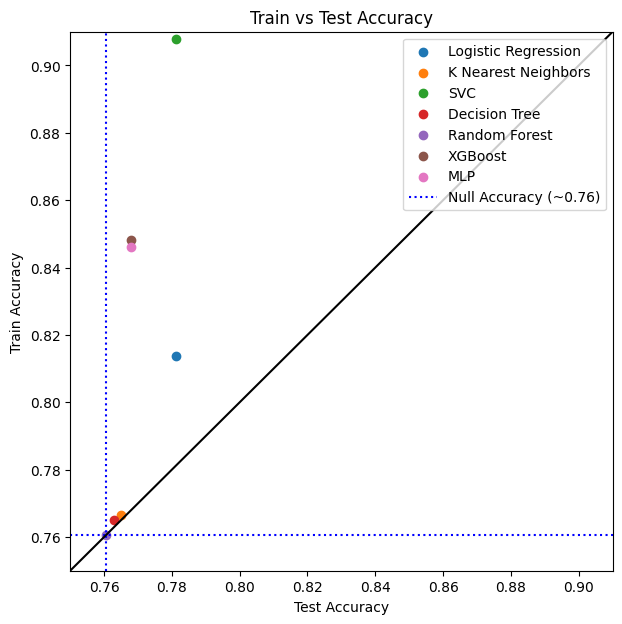

In [128]:
# Compare Accuracies across Models
model_names = results['Model']

train_accuracies = [acc[0] for acc in results['Accuracy']]
test_accuracies = [acc[1] for acc in results['Accuracy']]

window = (0.75, 0.91)

plt.figure(figsize=(7, 7))
[plt.scatter(test_accuracies[i], train_accuracies[i]) for i in range(len(models))]
plt.plot(window, [null_accuracy/100]*2, color='blue', linestyle='dotted')
plt.plot([null_accuracy/100]*2, window, color='blue', linestyle='dotted')
plt.plot(window, window, color='black', linestyle='-')
plt.xlabel('Test Accuracy')
plt.ylabel('Train Accuracy')
plt.title('Train vs Test Accuracy')
plt.legend(list(model_names) + ['Null Accuracy (~0.76)'], loc="best")
plt.xlim(window)
plt.ylim(window)
plt.show()

As evident, all classifiers (Random Forest barely) are scoring better than a DummyClassifier that predicts the most_frequent class (~0.76 Accuracy).

**Insights:**
- Random Forest seems as a good a DummyClassifier
- Decision Tree and KNN perform marginally better than the Null Accuracy
- Logistic Regression and SVC performs best followed by MLP and XGBoost in terms of test accuracy
    - **Logistic Regression** performs best (best test accuracy, least overfitting)

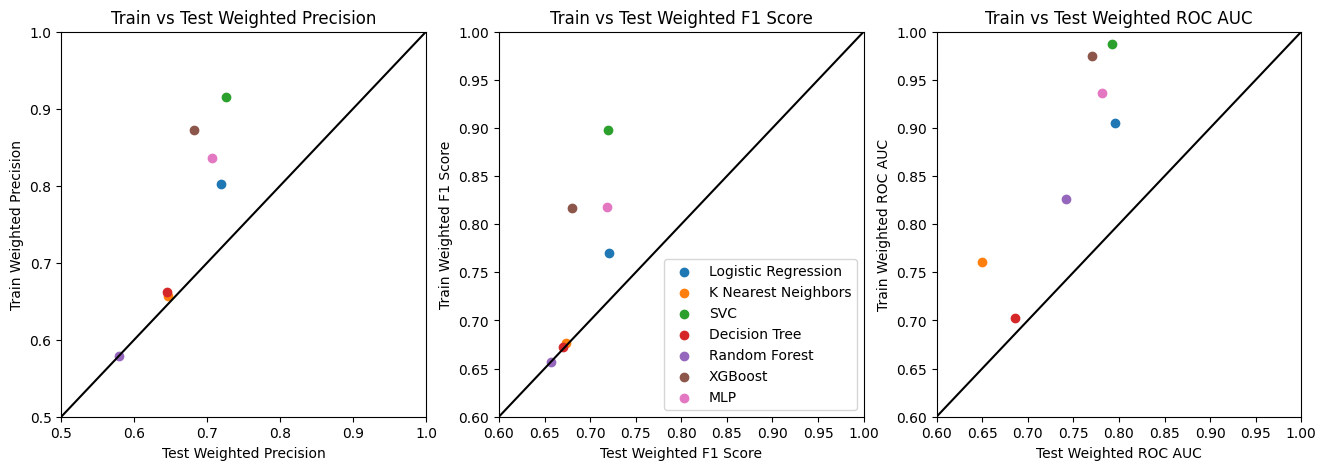

In [129]:
# Compare Weighted Precisions, Weighted F1 Scores, and Weighted ROC AUC across Models
# Weighted Recall is same as Accuracy, hence not plotted

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

train_precisions = [pre[0] for pre in results['Precision Weighted']]
test_precisions = [pre[1] for pre in results['Precision Weighted']]

train_f1 = [f1[0] for f1 in results['F1 Weighted']]
test_f1 = [f1[1] for f1 in results['F1 Weighted']]

train_roc_auc = [roc_auc[0] for roc_auc in results['ROC AUC OVR Weighted']]
test_roc_auc = [roc_auc[1] for roc_auc in results['ROC AUC OVR Weighted']]

[ax[0].scatter(test_precisions[i], train_precisions[i]) for i in range(len(models))]
[ax[1].scatter(test_f1[i], train_f1[i]) for i in range(len(models))]
[ax[2].scatter(test_roc_auc[i], train_roc_auc[i]) for i in range(len(models))]

[ax[i].plot((0, 1), (0, 1), color='black', linestyle='-') for i in range(3)]

[[ax[i].set_xlabel(f'Test {metric}'),
  ax[i].set_ylabel(f'Train {metric}'),
  ax[i].set_title(f'Train vs Test {metric}')] for (i, metric) in enumerate(['Weighted Precision', 'Weighted F1 Score', 'Weighted ROC AUC'])]

ax[0].set_xlim(0.5, 1), ax[0].set_ylim(0.5, 1)
ax[1].set_xlim(0.6, 1), ax[1].set_ylim(0.6, 1)
ax[2].set_xlim(0.6, 1), ax[2].set_ylim(0.6, 1)

ax[1].legend(list(model_names), loc="best")
plt.show()

**Insights:**
- Logistic Regression and SVC are the top contenders given the metric graphs.
    - Train and Test metric values for SVC have a higher deviation than Logistic Regression.
- MLP and XGBoost also perform relatively well.
- KNN, Decision Tree, and Random Forest do not perform as well in terms of Weighted Precision and Weighted F1 Scores.
    - Surprisingly, Random Forest, which lags behind in Precision and F1 Score, performs much better than KNN and Decision Tree in ROC AUC.

<a name='ROC-Curve'></a>
### 5.4.2 ROC Curves

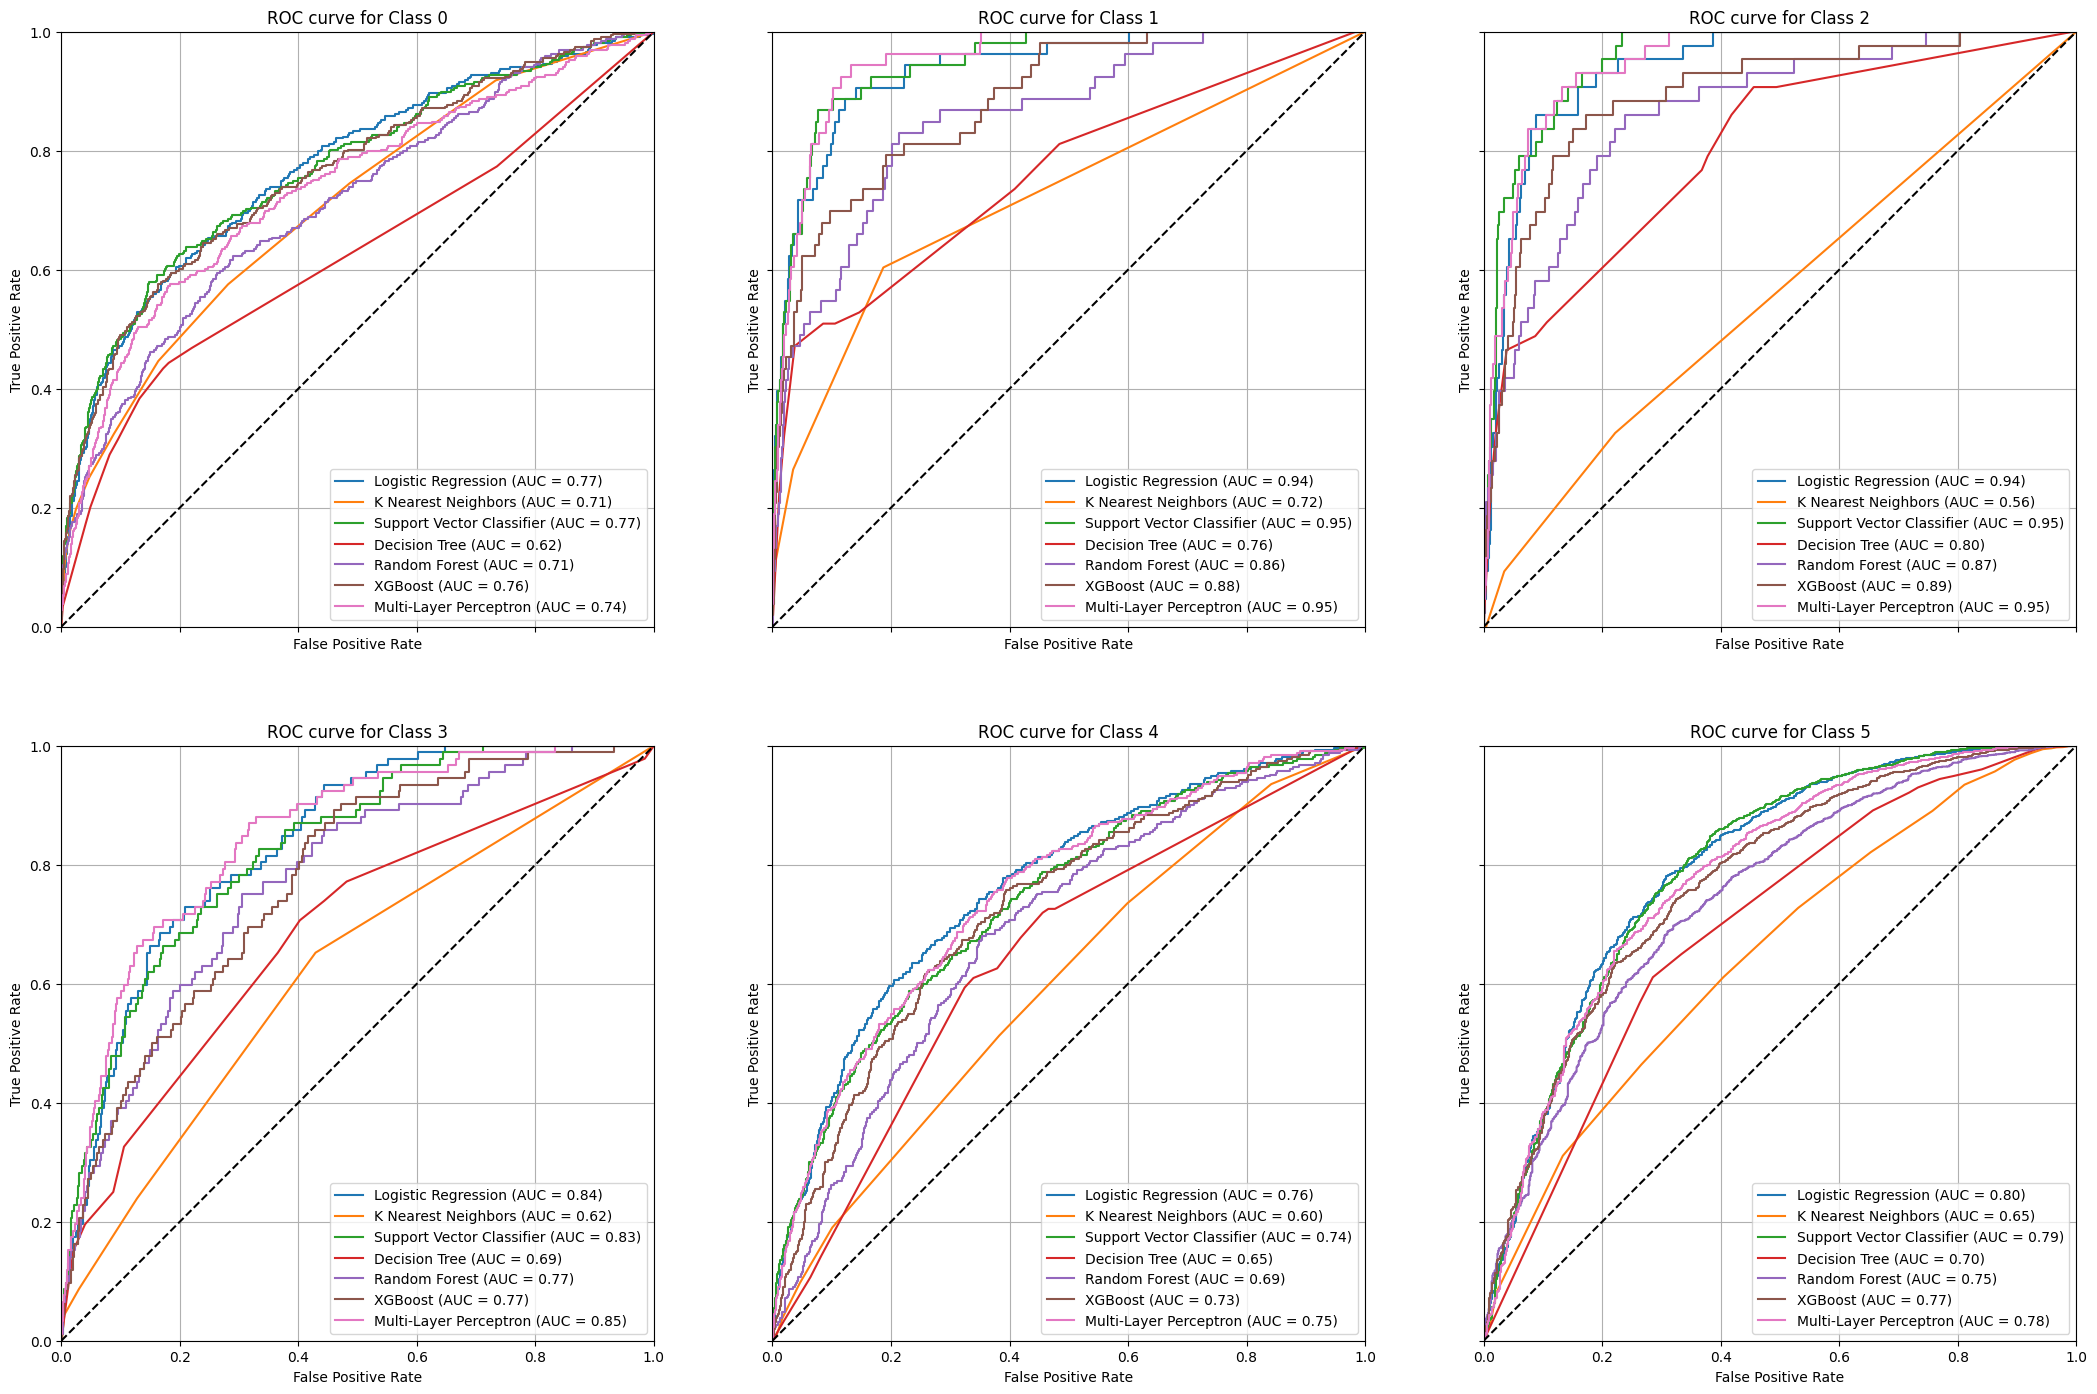

In [130]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Label Binarize y_val
y_val_encoded = label_binarize(y_val, classes=[0, 1, 2, 3, 4, 5])
n_classes = y_val_encoded.shape[1]

# Compute probabilities, tpr, fpr, and roc_auc for each model and plot the ROC curve
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(26, 17), sharex=True, sharey=True)
for model_name, model in models.items():
    y_val_pred_proba = model.predict_proba(X_val_preprocessed)
    for i in range(n_classes):
        fpr, tpr, threshold = roc_curve(y_val_encoded[:, i], y_val_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        ax[i//3, i%3].plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

[(ax[i//3, i%3].plot([0, 1], [0, 1], 'k--'),
  ax[i//3, i%3].set_xlabel('False Positive Rate'),
  ax[i//3, i%3].set_ylabel('True Positive Rate'),
  ax[i//3, i%3].set_title(f'ROC curve for Class {i}'),
  ax[i//3, i%3].set_xlim(0, 1),
  ax[i//3, i%3].set_ylim(0, 1),
  ax[i//3, i%3].legend(loc='best'),
  ax[i//3, i%3].grid(True)) for i in range(n_classes)]
plt.show()

The ROC Curves also show that Logistic Regression, SVC, and MLP are the best performing across the classes, while KNN and Decision Trees perform the worst. For classes 0, 4, and 5, almost all classifiers perform similarly.

**Remarks:**
- **Logistic Regression** is the best choice of all the models, given its test accuracy and proximity to the $y=x$ line in comparison to SVC.
- Given the diversity in performance metrics for the models, perhaps an **Ensemble** of these models can be trained and tested as well.

<a name='Ensemble'></a>
## 5.5 Ensemble

Ensemble Learning is a method to combine multiple models to produced improved results. While **Bagging** and **Boosting**, modelled before, only use a single type of model (in this case, a Decision Tree), methods like **Voting** and **Stacking** take advantage of wide variety of models.

In [131]:
from sklearn.ensemble import VotingClassifier, StackingClassifier

<a name='Voting'></a>
### 5.5.1 Voting Classifier

<a name='Hard-Voting'></a>
#### 5.5.1.1 Hard Voting Classifier
Final prediction is based on majority rule voting of predicted classes by the base estimators.

**Code:**
```python
base_classifiers = list(models.items())

hard_voting_model = VotingClassifier(
    estimators=base_classifiers,
    voting='hard',
    n_jobs=-1
)
hard_voting_model.fit(X_train_preprocessed, y_train)

print(f'Train Accuracy (Hard Voting)     : {hard_voting_model.score(X_train_preprocessed, y_train)}')
print(f'Validation Accuracy (Hard Voting): {hard_voting_model.score(X_val_preprocessed, y_val)}')
```

**Output:**
```
Train Accuracy (Hard Voting)     : 0.8064926175809133
Validation Accuracy (Hard Voting): 0.769140510413611
```

<a name='Soft-Voting'></a>
#### 5.5.1.2 Soft Voting Classifier

Final Prediction is the argmax of the sum of prediction probabilities of the base estimators.

In [132]:
base_classifiers = list(models.items())

soft_voting_model = VotingClassifier(
    estimators=base_classifiers,
    voting='soft',
    n_jobs=-1
)
soft_voting_model.fit(X_train_preprocessed, y_train)

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=1, max_iter=5000, n_jobs=-1,
                                                 random_state=42)),
                             ('K Nearest Neighbors',
                              KNeighborsClassifier(metric='cosine', n_jobs=-1,
                                                   n_neighbors=25)),
                             ('Support Vector Classifier',
                              SVC(C=5, probability=True, random_state=42)),
                             ('Decision Tree',
                              DecisionTreeClassifier(ccp_alpha=0.001,
                                                     random_state=42)),
                             ('Rand...
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=-1,
                                            num_parallel_tree=None,
                                            objective='multi:softmax', ...)),
                             ('Multi-Layer Perceptron',
                              MLPClassifier(alpha=0.1, early_stopping=True,
                                            hidden_layer_sizes=(1000, 500),
                                            random_state=42))],
                 n_jobs=-1, voting='soft')

In [133]:
print(f'Train Accuracy (Soft Voting)     : {soft_voting_model.score(X_train_preprocessed, y_train)}')
print(f'Validation Accuracy (Soft Voting): {soft_voting_model.score(X_val_preprocessed, y_val)}')

Train Accuracy (Soft Voting)     : 0.7909455363254131
Validation Accuracy (Soft Voting): 0.7679671457905544


Both the variations of Voting Classifiers portrayed similar results and trained in similar duration of time.

Even though **Hard-Voting Model** has a slightly better Validation Accuracy, the **Soft-Voting Model** is the one to proceed with as it is known to be robust to outliers and can mitigate the bias in an imbalanced dataset because it fundamentally considers probabilities to come to a prediction.

In [134]:
# Compute metrics for comparison for Soft-Voting Model
compute_comparison_metrics('Soft-Voting', soft_voting_model)
results

,Model,Accuracy,Precision Weighted,Recall Weighted,F1 Weighted,ROC AUC OVR Weighted
0,Logistic Regression,"[0.8137283660897624, 0.7811674977999413]","[0.801770568300515, 0.7183804013511351]","[0.8137283660897624, 0.7811674977999413]","[0.769950547690396, 0.7210089138261118]","[0.9055108068567163, 0.7961332042402459]"
1,K Nearest Neighbors,"[0.7665004400117337, 0.7650337342329129]","[0.6565101310182754, 0.6457023238611286]","[0.7665004400117337, 0.7650337342329129]","[0.6760792902218312, 0.6733775808954744]","[0.7609821889053148, 0.6499514510314031]"
2,SVC,"[0.9078908770900558, 0.7811674977999413]","[0.9152171442703476, 0.7258961084032665]","[0.9078908770900558, 0.7811674977999413]","[0.8982784123240224, 0.7198772523216851]","[0.9867725558118989, 0.7926257283506197]"
3,Decision Tree,"[0.7650337342329129, 0.7629803461425638]","[0.6620624406593635, 0.6449394581105806]","[0.7650337342329129, 0.7629803461425638]","[0.6719939800986534, 0.6708080812418546]","[0.7025567597325281, 0.6865377676601551]"
4,Random Forest,"[0.7605358365111958, 0.7606336168964506]","[0.5784147586177845, 0.5785634991529763]","[0.7605358365111958, 0.7606336168964506]","[0.6570894458632692, 0.6572219155656435]","[0.82586540651037, 0.7419278250737493]"
5,XGBoost,"[0.8481470616994231, 0.7679671457905544]","[0.8726308430508367, 0.6822466139017057]","[0.8481470616994231, 0.7679671457905544]","[0.8173477028676376, 0.6796485577716694]","[0.974352585153382, 0.7701523815382949]"
6,MLP,"[0.8460936736090741, 0.7679671457905544]","[0.8354723662327015, 0.7069139342754257]","[0.8460936736090741, 0.7679671457905544]","[0.8179634838230843, 0.7184980944019029]","[0.93663618857691, 0.7816128216188092]"
7,Soft-Voting,"[0.7909455363254131, 0.7679671457905544]","[0.8333476586941011, 0.7290491855352208]","[0.7909455363254131, 0.7679671457905544]","[0.7202311395578854, 0.675422026773792]","[0.961223837555125, 0.8078094638788577]"


Soft-Voting Model has decent test Accuracy and weighted F1 Score, yet the best test weighted Precision and ROC AUC value yet.

<a name='Stacking'></a>
### 5.5.2 Stacking Classifier

A Meta Estimator (in this case, Logistic Regression) makes a prediction based on the prediction probability outputs of each Base Estimator.

In [135]:
base_classifiers = list(models.items())

# Logistic Regression as a Meta Estimator for the Stacking Classifier
    # Hyperparameters chosen after tuning models across multiple notebooks for penalty='l1' using 'saga' solver and
    # penalty='l2' using 'lbfgs' solver for C=[0.01, 0.05, 0.1, 1]
    # Tuning each model took about 1-2 hours
meta_classifier = LogisticRegression(C=0.1, penalty='l2', max_iter=5000, n_jobs=-1, random_state=random_state)

stacking_model = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=meta_classifier,
    cv=2,
    n_jobs=-1,
    passthrough=True,
)
stacking_model.fit(X_train_preprocessed, y_train)

StackingClassifier(cv=2,
                   estimators=[('Logistic Regression',
                                LogisticRegression(C=1, max_iter=5000,
                                                   n_jobs=-1,
                                                   random_state=42)),
                               ('K Nearest Neighbors',
                                KNeighborsClassifier(metric='cosine', n_jobs=-1,
                                                     n_neighbors=25)),
                               ('Support Vector Classifier',
                                SVC(C=5, probability=True, random_state=42)),
                               ('Decision Tree',
                                DecisionTreeClassifier(ccp_alpha=0.001,
                                                       random_state=42))...
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=-1,
                                              num_parallel_tree=None,
                                              objective='multi:softmax', ...)),
                               ('Multi-Layer Perceptron',
                                MLPClassifier(alpha=0.1, early_stopping=True,
                                              hidden_layer_sizes=(1000, 500),
                                              random_state=42))],
                   final_estimator=LogisticRegression(C=0.1, max_iter=5000,
                                                      n_jobs=-1,
                                                      random_state=42),
                   n_jobs=-1, passthrough=True)

In [136]:
print(f'Train Accuracy (Stacking)     : {stacking_model.score(X_train_preprocessed, y_train)}')
print(f'Validation Accuracy (Stacking): {stacking_model.score(X_val_preprocessed, y_val)}')

Train Accuracy (Stacking)     : 0.883543561161631
Validation Accuracy (Stacking): 0.7829275447345263


In [137]:
# Compute metrics for comparison for Stacking Model
compute_comparison_metrics('Stacking', stacking_model)
results

,Model,Accuracy,Precision Weighted,Recall Weighted,F1 Weighted,ROC AUC OVR Weighted
0,Logistic Regression,"[0.8137283660897624, 0.7811674977999413]","[0.801770568300515, 0.7183804013511351]","[0.8137283660897624, 0.7811674977999413]","[0.769950547690396, 0.7210089138261118]","[0.9055108068567163, 0.7961332042402459]"
1,K Nearest Neighbors,"[0.7665004400117337, 0.7650337342329129]","[0.6565101310182754, 0.6457023238611286]","[0.7665004400117337, 0.7650337342329129]","[0.6760792902218312, 0.6733775808954744]","[0.7609821889053148, 0.6499514510314031]"
2,SVC,"[0.9078908770900558, 0.7811674977999413]","[0.9152171442703476, 0.7258961084032665]","[0.9078908770900558, 0.7811674977999413]","[0.8982784123240224, 0.7198772523216851]","[0.9867725558118989, 0.7926257283506197]"
3,Decision Tree,"[0.7650337342329129, 0.7629803461425638]","[0.6620624406593635, 0.6449394581105806]","[0.7650337342329129, 0.7629803461425638]","[0.6719939800986534, 0.6708080812418546]","[0.7025567597325281, 0.6865377676601551]"
4,Random Forest,"[0.7605358365111958, 0.7606336168964506]","[0.5784147586177845, 0.5785634991529763]","[0.7605358365111958, 0.7606336168964506]","[0.6570894458632692, 0.6572219155656435]","[0.82586540651037, 0.7419278250737493]"
5,XGBoost,"[0.8481470616994231, 0.7679671457905544]","[0.8726308430508367, 0.6822466139017057]","[0.8481470616994231, 0.7679671457905544]","[0.8173477028676376, 0.6796485577716694]","[0.974352585153382, 0.7701523815382949]"
6,MLP,"[0.8460936736090741, 0.7679671457905544]","[0.8354723662327015, 0.7069139342754257]","[0.8460936736090741, 0.7679671457905544]","[0.8179634838230843, 0.7184980944019029]","[0.93663618857691, 0.7816128216188092]"
7,Soft-Voting,"[0.7909455363254131, 0.7679671457905544]","[0.8333476586941011, 0.7290491855352208]","[0.7909455363254131, 0.7679671457905544]","[0.7202311395578854, 0.675422026773792]","[0.961223837555125, 0.8078094638788577]"
8,Stacking,"[0.883543561161631, 0.7829275447345263]","[0.8826151546621519, 0.7269125340507829]","[0.883543561161631, 0.7829275447345263]","[0.8665909223358305, 0.7339012265165052]","[0.9684740993793017, 0.8113059696964378]"


**Stacking Model** outperforms all other classifiers in each metric.

Thus, Ensemble Learning has provided us with better classifiers than their individual base estimators.

<a name='Model-Compare-2'></a>
## 5.6 Model Comparison Part-2

Comparing Ensemble classifiers with previously trained models

<a name='ROC-Curve-2'></a>
### 5.6.1 ROC Curves

In [138]:
# Compiling all trained models
models = {
    'Logistic Regression': lr,
    'K Nearest Neighbors': knn,
    'Support Vector Classifier': svc,
    'Decision Tree': dt,
    'Random Forest': rf,
    'XGBoost': xgb,
    'Multi-Layer Perceptron': mlp,
    'Soft-Voting': soft_voting_model,
    'Stacking': stacking_model
}

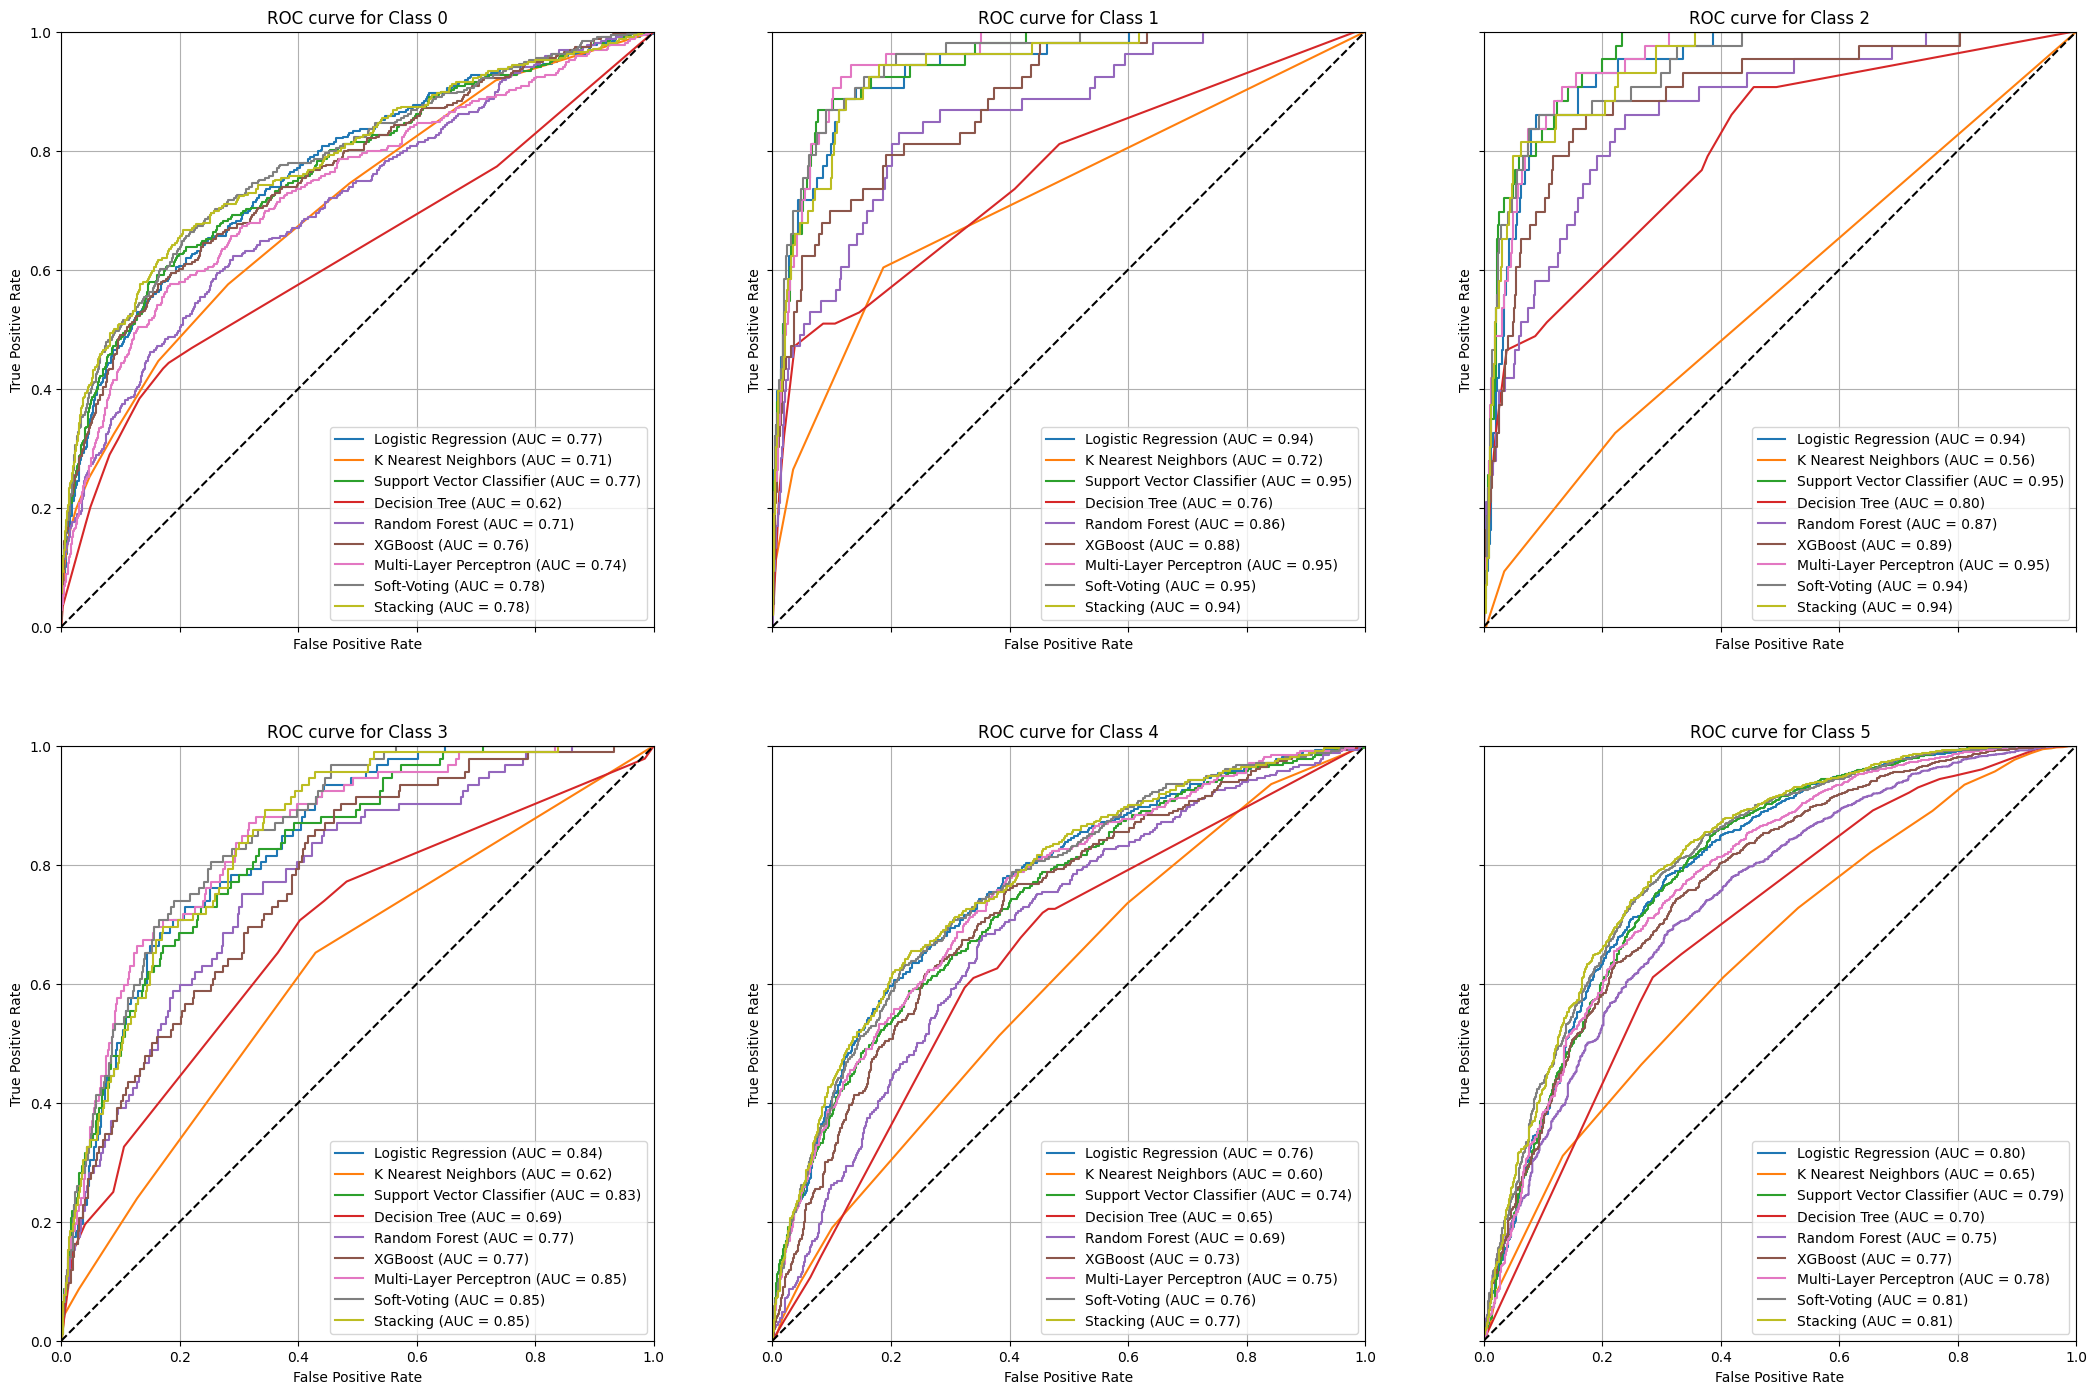

In [139]:
# Label Binarize y_val
y_val_encoded = label_binarize(y_val, classes=[0, 1, 2, 3, 4, 5])
n_classes = y_val_encoded.shape[1]

# Compute probabilities, tpr, fpr, and roc_auc for each model and plot the ROC curve
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(26, 17), sharex=True, sharey=True)
for model_name, model in models.items():
    y_val_pred_proba = model.predict_proba(X_val_preprocessed)
    for i in range(n_classes):
        fpr, tpr, threshold = roc_curve(y_val_encoded[:, i], y_val_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        ax[i//3, i%3].plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

[(ax[i//3, i%3].plot([0, 1], [0, 1], 'k--'),
  ax[i//3, i%3].set_xlabel('False Positive Rate'),
  ax[i//3, i%3].set_ylabel('True Positive Rate'),
  ax[i//3, i%3].set_title(f'ROC curve for Class {i}'),
  ax[i//3, i%3].set_xlim(0, 1),
  ax[i//3, i%3].set_ylim(0, 1),
  ax[i//3, i%3].legend(loc='best'),
  ax[i//3, i%3].grid(True)) for i in range(n_classes)]
plt.show()

Ensemble models (Soft-Voting and Stacking) have the highest AUC value for almost all the classes.

Thus, the ROC Curves strengthen the claim that Ensemble classifiers take advantage of their base estimators to enhance their predictive capabilities.

<a name='Confusion-Error-Matrix'></a>
### 5.6.2 Confusion and Error Matrices

In [140]:
# Computing Confusion Matrix for Stacking, Soft-Voting, and Logistic Regression (Top-3 Models)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_val_pred = stacking_model.predict(X_val_preprocessed)
conf_mat_stacking = confusion_matrix(y_val, y_val_pred)

y_val_pred = soft_voting_model.predict(X_val_preprocessed)
conf_mat_soft_voting = confusion_matrix(y_val, y_val_pred)

y_val_pred = lr.predict(X_val_preprocessed)
conf_mat_lr = confusion_matrix(y_val, y_val_pred)

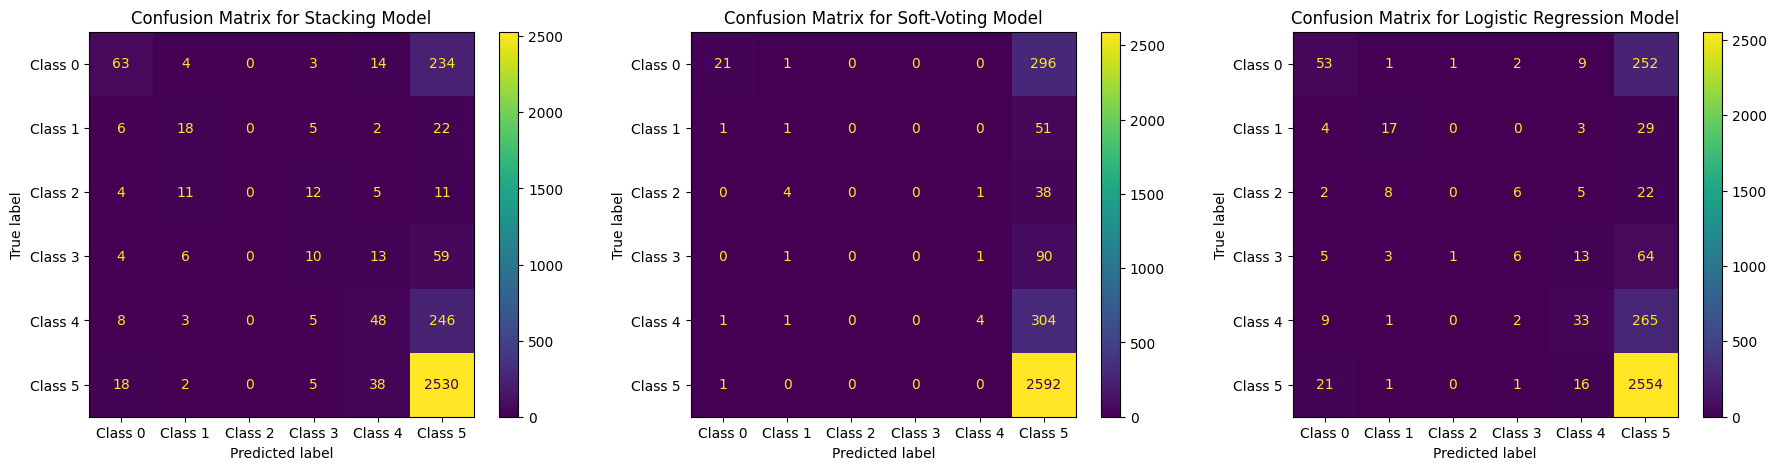

In [141]:
# Rendering the Confusion Matrix
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(22, 5))

ConfusionMatrixDisplay(conf_mat_stacking, display_labels=[f'Class {i}' for i in range(n_classes)]).plot(ax=ax[0])
ConfusionMatrixDisplay(conf_mat_soft_voting, display_labels=[f'Class {i}' for i in range(n_classes)]).plot(ax=ax[1])
ConfusionMatrixDisplay(conf_mat_lr, display_labels=[f'Class {i}' for i in range(n_classes)]).plot(ax=ax[2])

ax[0].set_title('Confusion Matrix for Stacking Model')
ax[1].set_title('Confusion Matrix for Soft-Voting Model')
ax[2].set_title('Confusion Matrix for Logistic Regression Model')

plt.show()

Confusion Matrix are not very informative because the class imbalance skews the color gradient scale. Rather, Error Matrices are plotted ahead to understand certain model behavior.

> **Note:** For the purposes of model comparison, in this notebook an Error Matrix is defined as a way to respresent the Confusion Matrix without the correct classifications, thus highlighting the errors in prediction.

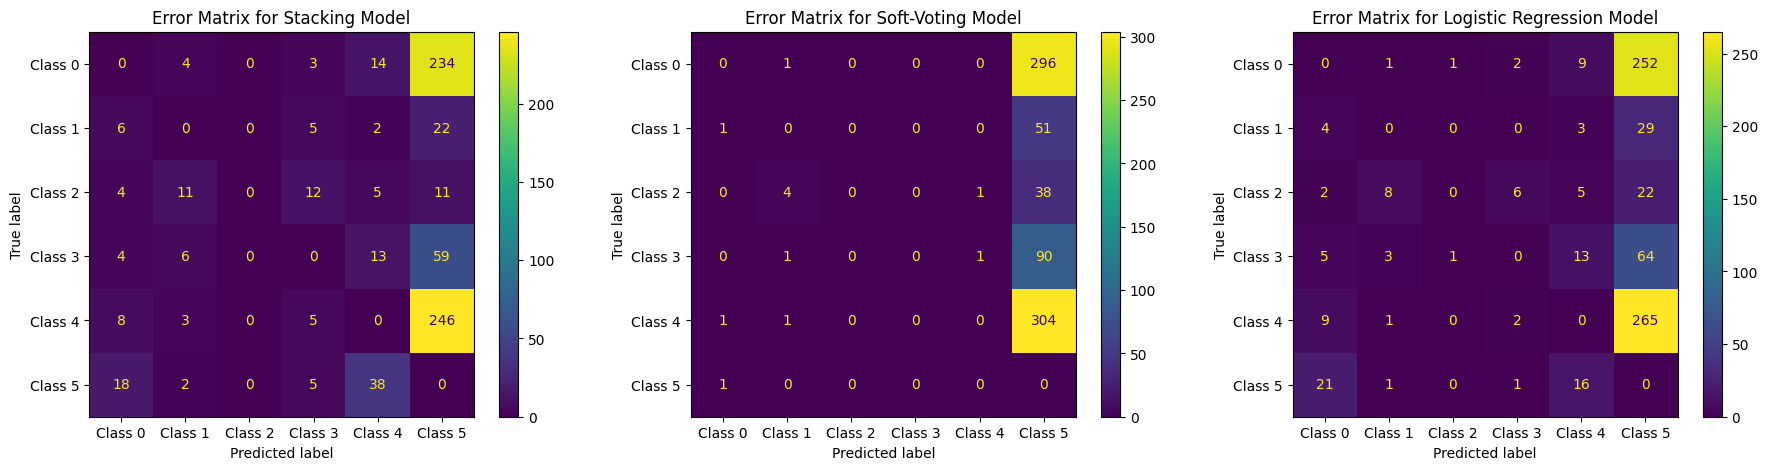

In [142]:
# Computing and Rendering Error Matrics for Stacking, Soft-Voting and Logistic Regression
error_mat_stacking = np.copy(conf_mat_stacking)
error_mat_soft_voting = np.copy(conf_mat_soft_voting)
error_mat_lr = np.copy(conf_mat_lr)
for i in range(n_classes):
    error_mat_stacking[i][i] = 0
    error_mat_soft_voting[i][i] = 0
    error_mat_lr[i][i] = 0

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(22, 5))

ConfusionMatrixDisplay(error_mat_stacking, display_labels=[f'Class {i}' for i in range(n_classes)]).plot(ax=ax[0])
ConfusionMatrixDisplay(error_mat_soft_voting, display_labels=[f'Class {i}' for i in range(n_classes)]).plot(ax=ax[1])
ConfusionMatrixDisplay(error_mat_lr, display_labels=[f'Class {i}' for i in range(n_classes)]).plot(ax=ax[2])

ax[0].set_title('Error Matrix for Stacking Model')
ax[1].set_title('Error Matrix for Soft-Voting Model')
ax[2].set_title('Error Matrix for Logistic Regression Model')

plt.show()

The above matrices highlight that all top-3 models are making significant **Type-1 Errors** (False Positives) over Type-2 Errors (False Negatives), especially for actual classes 0 and 4 against predicted class 5.

- For an Actual Rating of 4 and a Predicted Rating of 5, these errors might be plausible as certain features are likely to overlap between a 'Good' and a 'Very Good' recipe review.

- For an Actual Rating of 0 and a Predicted Rating of 5, a likely scenario that might justify these errors to occur is if users tend to write **_'great'_** reviews for a recipe (causing the model to predict a Rating of 5), yet **_'forget'_** to submit an actual rating (Actual Rating entered as 0 into the system).
    - Ways to mitigate this have been discussed in [6.2 Closing Remarks Further Scope](#Close-Scope) ahead.

<a name='Conclusion'></a>
# 6. Conclusion

<a name='Final-Model'></a>
## 6.1 Final Model and Generating Submission File

Based on the metrics and ROC Curves, the top 3 performing classifiers are:

1. Stacking Classifier
2. Soft-Voting Classifier
3. Logistic Regression Classifier

In [143]:
# Final Model Pipeline
model = Pipeline([('preprocessor', preprocessor),
#                   ('classifier', lr)
#                   ('classifier', soft_voting_model)
                  ('classifier', stacking_model)
])
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ct',
                                                                   ColumnTransformer(transformers=[('normalizer',
                                                                                                    Normalizer(),
                                                                                                    ['ID',
                                                                                                     'BestScore',
                                                                                                     'RecipeNumber',
                                                                                                     'ThumbsUpCount',
                                                                                                     'ThumbsDownCount']),
                                                                                                   ('encode_reputation',
                                                                                                    FunctionTransformer(func=<function categorise_reputation at...
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=100,
                                                               n_jobs=-1,
                                                               num_parallel_tree=None,
                                                               objective='multi:softmax', ...)),
                                                ('Multi-Layer Perceptron',
                                                 MLPClassifier(alpha=0.1,
                                                               early_stopping=True,
                                                               hidden_layer_sizes=(1000,
                                                                                   500),
                                                               random_state=42))],
                                    final_estimator=LogisticRegression(C=0.1,
                                                                       max_iter=5000,
                                                                       n_jobs=-1,
                                                                       random_state=42),
                                    n_jobs=-1, passthrough=True))])

In [144]:
# Train Model on the entire train.csv dataset
X_combined = pd.concat([X_train, X_val])
y_combined = pd.concat([y_train, y_val])
model.fit(X_combined, y_combined)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ct',
                                                                   ColumnTransformer(transformers=[('normalizer',
                                                                                                    Normalizer(),
                                                                                                    ['ID',
                                                                                                     'BestScore',
                                                                                                     'RecipeNumber',
                                                                                                     'ThumbsUpCount',
                                                                                                     'ThumbsDownCount']),
                                                                                                   ('encode_reputation',
                                                                                                    FunctionTransformer(func=<function categorise_reputation at...
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=100,
                                                               n_jobs=-1,
                                                               num_parallel_tree=None,
                                                               objective='multi:softmax', ...)),
                                                ('Multi-Layer Perceptron',
                                                 MLPClassifier(alpha=0.1,
                                                               early_stopping=True,
                                                               hidden_layer_sizes=(1000,
                                                                                   500),
                                                               random_state=42))],
                                    final_estimator=LogisticRegression(C=0.1,
                                                                       max_iter=5000,
                                                                       n_jobs=-1,
                                                                       random_state=42),
                                    n_jobs=-1, passthrough=True))])

In [145]:
# Creating submission.csv
X_test = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')

y_test_pred = model.predict(X_test)

submission = pd.DataFrame({
    'ID': range(1, 4547),
    'Rating': y_test_pred
})

submission.to_csv('submission.csv', index=False)

<a name='Close-Scope'></a>
## 6.2 Closing Remarks and Further Scope



The top-3 models, namely Stacking, Soft-Voting and Logistic Regression, portray a satisfactory test accuracy (~78%) given the dataset and constraints on library usage.

#### **Handling Imbalance and Outliers**
Though, various efforts have been made to diminish the impact of the **imbalanced** dataset as well as **outliers**, I believe the data can be further experimented with and refined, perhaps
- using techniques like `SMOTETomek`, from the _imblearn_ library, to apply a mixture of **Oversampling** (SMOTE) and **Undersampling** (Tomek Links) in order to rebalance the dataset.
- using certain **Unsupervised** algorithms like `IsolationForest` or `LocalOutlierFactor` to better detect outliers.
- using Feature Selection techniques such as Recursive Feature Elimination (RFE) or Sequential Feature Selection (SFS) could help remove noisy variables and further mitigate the chances of fitting the noise. 

#### **Improved Text Processing**
I am satisfied with the custom preprocessor developed for the Tf-Idf vectorization given the library constraints. Nevertheless, beyond this Kaggle competition, I believe various suites of libraries that have been already developed from years of text processing experience and much more massive datasets could benefit this model.
- Libraries like _Natural Language Toolkit_ (_nltk_) might have better preprocessors, tokenizers and even **lemmatizers** for the purpose. _Nltk_ also has more extensive set of stop words than _Scikit-Learn_ and could be beneficial in that regard as stopwords are being used to vectorize the 'Recipe_Review' feature.
- Libraries like _TextBlob_ and _SpaCy_ might be beneficial as they can be employed to perform **Sentiment Analysis** and arrive at 'Polarity' and 'Subjectivity' scores.
- Tools like _OpenRefine_ and other Lemmatization techniques can help in refining the tokenized words.
    - For e.g., currently words like `['zucchini', 'zucchine', 'zuchhini', 'zuchinni']` are being treated as separate words despite the fact that they refer to the same entity and are just spelling errors).

#### **Deep Learning Approach**
Given the fact that the MLP model was among the top-5 classifiers, exploring deep-learning libraries like _TensorFlow_ and _Keras_ might be advantageous in that regard. These APIs could be used to develop an Auto-Encoder which usually is a better alternative to SVD. Also, various other activation functions like 'Scaled Exponential Linear Unit' (SELU), which are not available in the _Scikit-Learn_, could be utilised. Overall, _TensorFlow_ and _Keras_ will provide better flexibility to code each individual hidden layer of a neural network.

#### **Tackling Misclassification Errors and Handling 0 Rating**
Beyond data processing, from the misclassifications in the Error Matrices, it is significant that class 0 and 5 have overlapping features. The reason behind this, as already stated, could be writing 'great' reviews but not manually entering a rating. 0 as a Rating is not part of the 1-5 scale since 0 highlights unrated. Ideally, 0 ratings should not be considered while training such a model and only a value from 1-5 should be outputted; however, the competition requires us to predict 0's as well.

There are 2 ways to solve this:

1. Consider 0 as a separate class and perform multi-class classification (Approach followed in this notebook)

2. Consider the entire problem as a multi-output multi-class problem with 2 target values to be predicted
    - First model predicts the ideal rating in the range 1-5 (Ordinal target could employ both Regression and Classification techniques)
    - Second model predicts if the review will be ultimately rated or not
    - Considering both these predicted targets or their probabilities, a final prediction could made in a way similar to how a Stacking Classifier works. For e.g.,
        - If the first model predicts a Rating of 5 and the second model predicts that the review will be rated, then the final prediction could be 5
        - However, if the first model predicts a Rating of 5, yet the second model predicts that the review will not be rated, then the final prediction could be 0

#### **Closing Remarks**
Overall, the entire journey of a developing ML model to predict Recipe Review Ratings has been a challenging yet rewarding one. It was an exciting process to develop ML models in a competitive environment that always fuels one to think of out-of-the-box methods to approach problems. All in all, I am extremely pleased with what I have managed to create and this competition, being my first, has acted as an impetus for me to participate in many more.